In [311]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0. Load Connectome

In [312]:
# Load Exp Bias
SparkMetaBias = pd.read_csv("dat/Jon_data/Spark_Final_ExpBias.csv")
SparkMetaBias.columns = ["STR", "EFFECT", "Rank", "NGene"]
SparkMetaBias = SparkMetaBias.set_index("STR")

In [313]:
g = LoadConnectome2() # Load Connectiome
EdgeWeightsDict = EdgeDict(g, keyon="label")
str2reg = STR2Region()


In [4]:
adj_mat = pd.read_csv(ConnFil, index_col=0)
adj_mat_local, adj_mat_distal = LocalDistal_Region()
g_local_region = LoadConnectome2(ConnFil=adj_mat_local)
g_distal_region = LoadConnectome2(ConnFil=adj_mat_distal)
EdgeWeightsDict_local_region = EdgeDict(g_local_region, keyon="label")
EdgeWeightsDict_distal_region = EdgeDict(g_distal_region, keyon="label")

In [160]:
# ASD
SA_ = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.csv"
Weighted = False; Directed = False
Incircuit_ = GetBestCoheSAFil(SA_, Weighted, Directed, g=g, EdgeWeightsDict=EdgeWeightsDict)

Best Cohe 0.383745229264481


In [161]:
print(len(Incircuit_))

38


In [48]:
top_nodes = g.vs.select(label_in=Incircuit_)
g2 = g.subgraph(top_nodes)

In [70]:
Cartesian_distances = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv",
                                   index_col=0)
Exp_distances = pd.read_csv("../dat/allen-mouse-conn/Dist_ExpressionCorrelation.csv",
                                   index_col="ROW")

In [73]:
Cartesian_distances.loc[ssrc_name]

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
Anterior_amygdalar_area,0.000000,4863.769115,4506.176317,1962.937849,3232.355952,1748.392118,3235.061823,2301.358295,2608.759284,6435.351583,...,6063.311801,6155.942251,6426.702109,2283.774288,2068.967134,2349.201992,2592.898957,2759.189192,3062.168349,7146.415185
Anterior_cingulate_area_dorsal_part,4863.769115,0.000000,695.071939,3821.730629,2093.591412,4451.755272,3458.052197,4909.811605,3827.613486,8904.984559,...,5175.664209,5912.116795,5422.983496,3758.739815,5058.964815,3659.405689,3555.014065,3870.481236,4931.848031,8729.762311


In [78]:
SparkMetaBias

,EFFECT,Rank,NGene
STR,,,
Dentate_gyrus,0.466543,1,147
Field_CA1,0.448538,2,147
Orbital_area_lateral_part,0.440954,3,147
Prelimbic_area,0.399311,4,147
Orbital_area_ventrolateral_part,0.391047,5,147
...,...,...,...
Principal_sensory_nucleus_of_the_trigeminal,-0.487382,209,147
Paragigantocellular_reticular_nucleus_lateral_part,-0.489319,210,147
Pontine_reticular_nucleus_caudal_part,-0.510437,211,147


In [80]:
# Annotate graph

# Annotate Region to Node
for i in enumerate(g2.vs):
    label_ = g2.vs[i]["label"][0]
    g2.vs[i]["region"] = str2reg[label_]
    g2.vs[i]["Bias"] = SparkMetaBias.loc[label_, "EFFECT"]
    g2.vs[i]["Bias_Rank"] = SparkMetaBias.loc[label_, "Rank"]

# Annotate Edge with 1.+= Cross Region; 2. Cartesin Distance; 3. Expression pho
for i, e in enumerate(g2.es):
    src_idx = e.source
    tgt_idx = e.target
    src_name = g2.vs(src_idx)["label"][0]
    tgt_name = g2.vs(tgt_idx)["label"][0]
    if g2.vs(src_idx)["region"] == g2.vs(tgt_idx)["region"]:
        g2.es[i]["Region"] = "within"
    else:
        g2.es[i]["Region"] = "across"
    g2.es[i]["Cartesian_dist"] = Cartesian_distances.loc[src_name, tgt_name]
    g2.es[i]["Expression_dist"] = Exp_distances.loc[src_name, tgt_name]

In [81]:
g2.write_gml("spark_meta_circuit.gml")

## Anly the graph

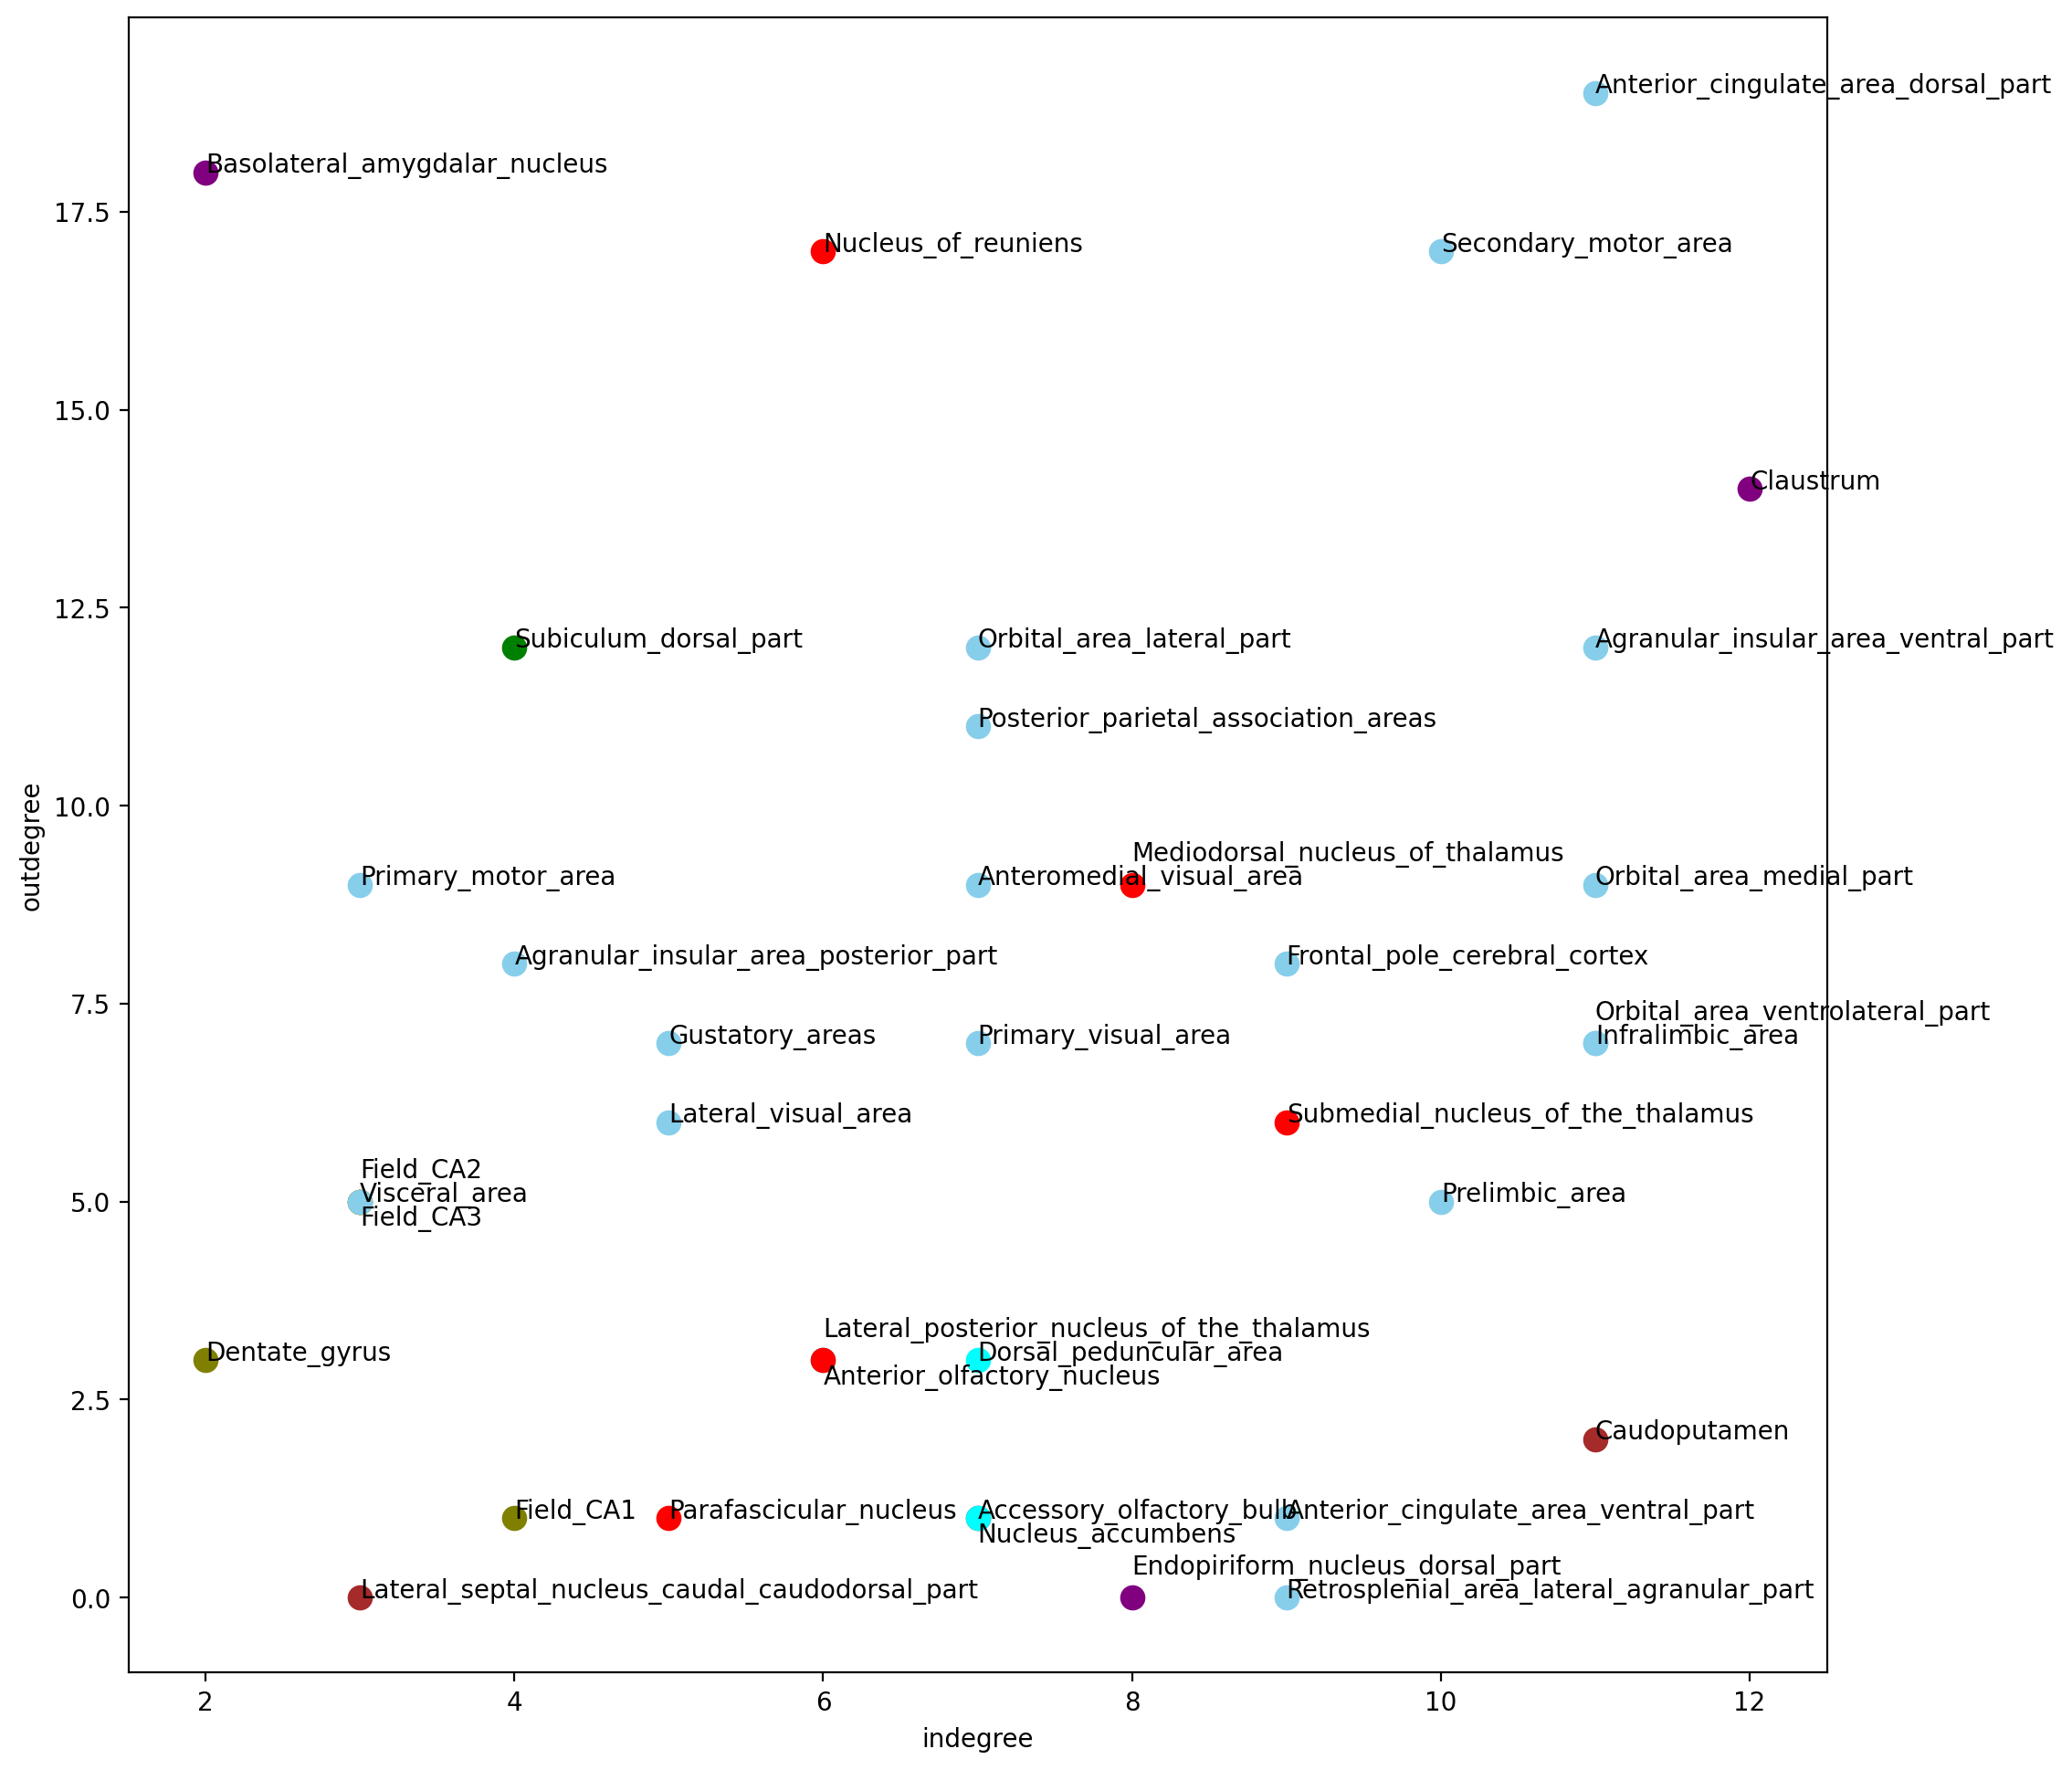

In [151]:
plt.figure(dpi=200, figsize=(12,12))
color_dict = {"Isocortex":"skyblue", "Thalamus": "red", "Striatum":"brown", "Olfactory_areas":"cyan", 
             "Hippocampal_formation":"green", "Hippocampal_region":"olive", "Cortical_subplate":"purple"}
for node in g2.vs:
    #print(node)
    label_ = node["label"]
    reg = node["region"]
    #print(label_)
    #print(node.indegree(), node.outdegree())
    plt.scatter(node.indegree(), node.outdegree(), marker="o", color=color_dict[reg], s=80)
    x = node.indegree(); y = node.outdegree()
    if label_== "Mediodorsal_nucleus_of_thalamus":
        y += 0.3
    if label_ == "Orbital_area_ventrolateral_part":
        y += 0.3
    if label_ == "Field_CA2":
        y += 0.3
    if label_ == "Field_CA3":
        y -= 0.3
    if label_ == "Endopiriform_nucleus_dorsal_part":
        y += 0.3
    if label_ == "Lateral_posterior_nucleus_of_the_thalamus":
        y += 0.3
    if label_ == "Anterior_olfactory_nucleus":
        y -= 0.3
    if label_ == "Nucleus_accumbens":
        y -= 0.3
    plt.text(x, y, label_)
plt.xlabel("indegree")
plt.ylabel("outdegree")
plt.savefig("Figs/Circuit.Degree.pdf")

## Cortical vs other connection

In [24]:
str_reg_df = pd.read_csv("dat/structure2region.map", delimiter="\t")
Regions = set(str_reg_df["REG"].values)
Reg2STRs = {}
for REG in Regions:
    Reg2STRs[REG] = str_reg_df[str_reg_df["REG"]==REG]["STR"].values

In [27]:
# mask out reg2reg and others adj_mat
Reg2Reg_Mat = {}
for REG, STRs in Reg2STRs.items():
    adj_mat_1, adj_mat_2 = MaskCortex2Cortex(adj_mat, STRs)
    Reg2Reg_Mat[REG] = (adj_mat_1, adj_mat_2)

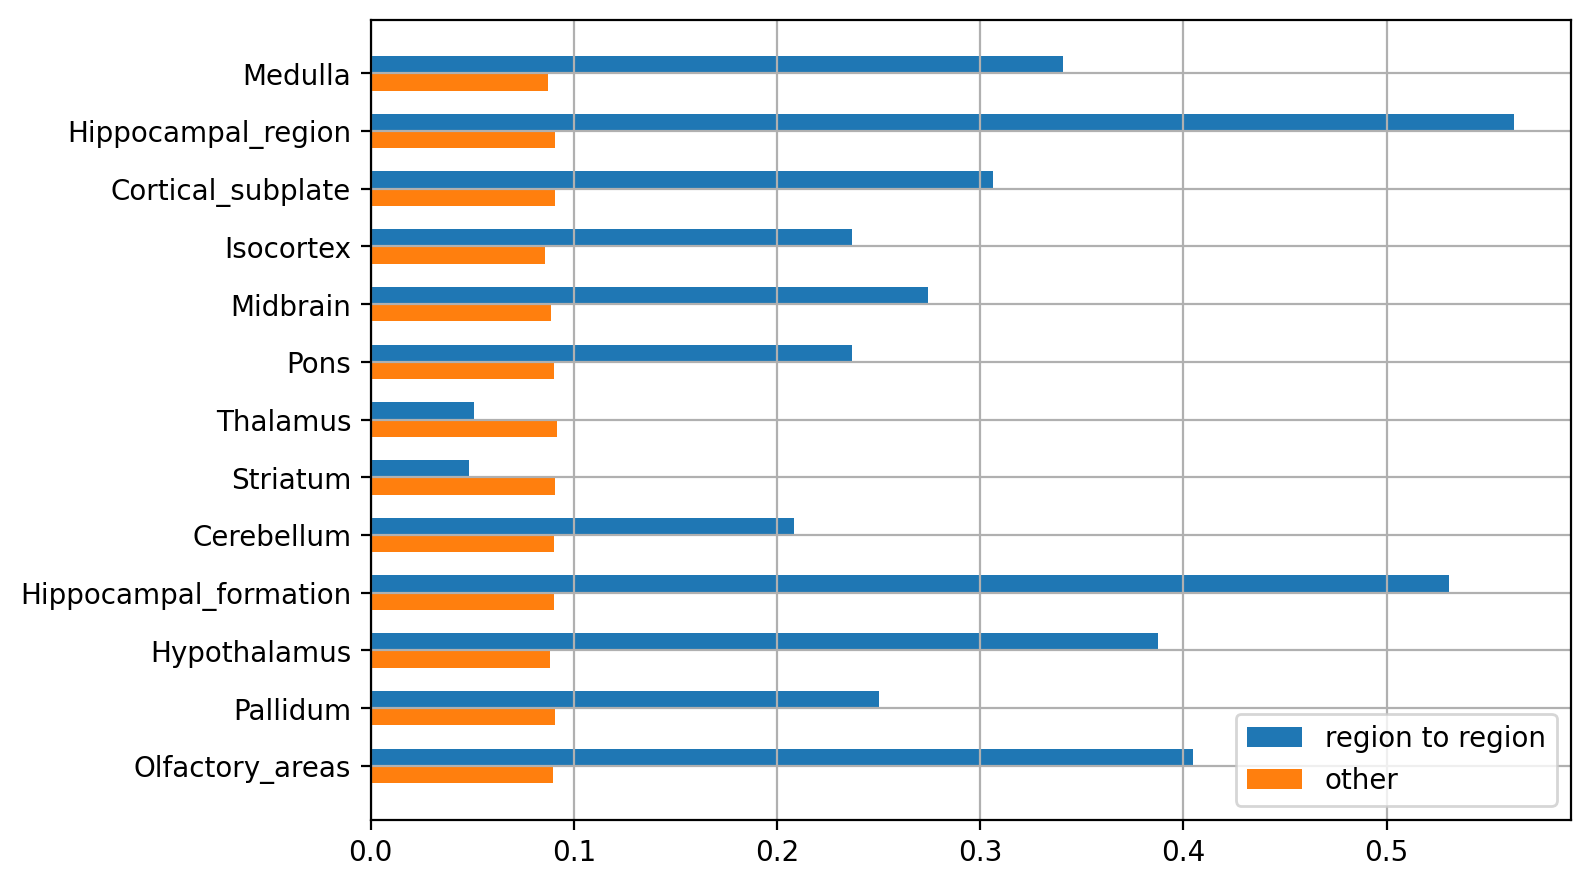

In [40]:
dat_reg2reg = []
dat_other = []
Regions = []
for REG, (adj1, adj2) in Reg2Reg_Mat.items():
    #print(REG)
    N_cortical = len(Reg2STRs[REG])
    C2C_total = N_cortical * N_cortical
    Other_total = 213*213 - C2C_total
    C2C_Density = np.count_nonzero(adj1.values) / C2C_total
    Other_Density = np.count_nonzero(adj2.values) / Other_total
    #print(C2C_Density, Other_Density)
    dat_reg2reg.append(C2C_Density)
    dat_other.append(Other_Density)
    Regions.append(REG)
    
fig = plt.figure(dpi=200)
ax = fig.add_axes([0,0,1,1])
width = 0.3
ind = np.arange(len(Reg2Reg_Mat)) 
ax.barh(ind+width/2, dat_reg2reg, width, label="region to region")
ax.barh(ind-width/2, dat_other, width, label="other")
ax.legend()
ax.set_yticks(ind)
ax.grid(True)
ax.set_yticklabels(Regions)
plt.savefig("figs/Regions_specific_connection_density.pdf")

In [18]:
# Density:
N_cortical = len(Cortex_STRs)
C2C_total = N_cortical * N_cortical
Other_total = 213*213 - C2C_total
C2C_Density = np.count_nonzero(adj_mat_c2c.values) / C2C_total
Other_Density = np.count_nonzero(adj_mat_other.values) / Other_total
print(C2C_Density, Other_Density)

0.23684210526315788 0.0859647125782584


In [19]:
C2C_weights = [x for x in adj_mat_c2c.values.flatten() if x > 0]
Other_weights = [x for x in adj_mat_other.values.flatten() if x > 0]

MannwhitneyuResult(statistic=629338.0, pvalue=0.21859965591666014)

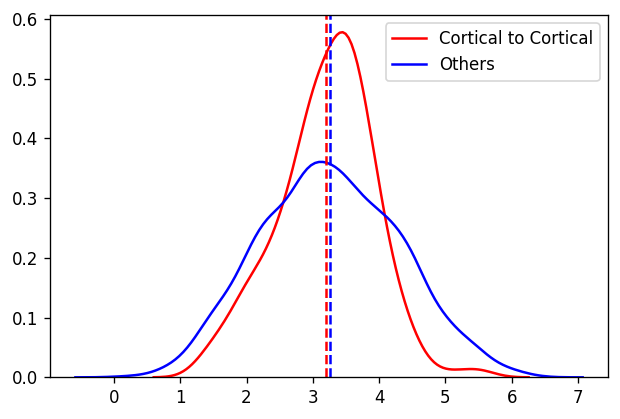

In [30]:
plt.figure(dpi=120)
sns.distplot(a=C2C_weights, hist=False, color="red", label="Cortical to Cortical")
sns.distplot(a=Other_weights, hist=False, color="blue", label="Others")
plt.axvline(x=np.mean(C2C_weights), c="red", linestyle="--")
plt.axvline(x=np.mean(Other_weights), c="blue", linestyle="--")
plt.savefig("figs/Cortical_vs_Other_Weights.pdf")
mannwhitneyu(C2C_weights, Other_weights)

## 0. Circuit STRs

In [128]:
SA_ = "dat/circuits/ASD_Pad1_SA.csv"
Weighted = False; Directed = False
Incircuit_ = GetBestCoheSAFil(SA_, Weighted, Directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
asd_scores_total = ScoreSTRSet(g, Incircuit_, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
print(len(Incircuit_), np.mean(asd_scores_total), Incircuit_)

38 0.383745229264481 ['Dentate_gyrus' 'Field_CA1' 'Orbital_area_lateral_part' 'Prelimbic_area'
 'Orbital_area_ventrolateral_part' 'Field_CA2' 'Infralimbic_area'
 'Dorsal_peduncular_area' 'Nucleus_accumbens' 'Field_CA3'
 'Anterior_olfactory_nucleus' 'Lateral_posterior_nucleus_of_the_thalamus'
 'Accessory_olfactory_bulb' 'Claustrum' 'Subiculum_dorsal_part'
 'Endopiriform_nucleus_dorsal_part' 'Anteromedial_visual_area'
 'Primary_visual_area' 'Agranular_insular_area_ventral_part'
 'Caudoputamen' 'Anterior_cingulate_area_dorsal_part' 'Primary_motor_area'
 'Retrosplenial_area_lateral_agranular_part' 'Gustatory_areas'
 'Parafascicular_nucleus' 'Secondary_motor_area' 'Nucleus_of_reuniens'
 'Frontal_pole_cerebral_cortex' 'Orbital_area_medial_part' 'Visceral_area'
 'Lateral_septal_nucleus_caudal_caudodorsal_part' 'Lateral_visual_area'
 'Agranular_insular_area_posterior_part' 'Basolateral_amygdalar_nucleus'
 'Anterior_cingulate_area_ventral_part'
 'Submedial_nucleus_of_the_thalamus' 'Mediodorsal_

In [127]:
Jon_STRs_ = pd.read_csv("dat/Jon_data/Jon_Binary_Undirected_Cir_STRs.txt", header=None)[0].values
Jon_STRs_ = [x.strip() for x in Jon_STRs_]
asd_scores_total = ScoreSTRSet(g, Jon_STRs_, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
print(len(Jon_STRs_), np.mean(asd_scores_total), Jon_STRs_)

38 0.38341390679062287 ['Dentate_gyrus', 'Field_CA1', 'Orbital_area_lateral_part', 'Prelimbic_area', 'Orbital_area_ventrolateral_part', 'Field_CA2', 'Infralimbic_area', 'Dorsal_peduncular_area', 'Nucleus_accumbens', 'Field_CA3', 'Anterior_olfactory_nucleus', 'Lateral_posterior_nucleus_of_the_thalamus', 'Accessory_olfactory_bulb', 'Claustrum', 'Subiculum_dorsal_part', 'Endopiriform_nucleus_dorsal_part', 'Anteromedial_visual_area', 'Primary_somatosensory_area_lower_limb', 'Primary_visual_area', 'Agranular_insular_area_ventral_part', 'Caudoputamen', 'Anterior_cingulate_area_dorsal_part', 'Primary_motor_area', 'Retrosplenial_area_lateral_agranular_part', 'Gustatory_areas', 'Secondary_motor_area', 'Nucleus_of_reuniens', 'Frontal_pole_cerebral_cortex', 'Orbital_area_medial_part', 'Visceral_area', 'Lateral_septal_nucleus_caudal_caudodorsal_part', 'Lateral_visual_area', 'Agranular_insular_area_posterior_part', 'Basolateral_amygdalar_nucleus', 'Anterior_cingulate_area_ventral_part', 'Submedial_

In [129]:
print(set(Incircuit_).difference(set(Jon_STRs_)))
print(set(Jon_STRs_).difference(set(Incircuit_)))

{'Parafascicular_nucleus'}
{'Primary_somatosensory_area_lower_limb'}


In [130]:
SA_ = "dat/circuits/ASD_Pad1_SA.wd.csv"
Weighted = True; Directed = True
Incircuit_ = GetBestCoheSAFil(SA_, Weighted, Directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
asd_scores_total = ScoreSTRSet(g, Incircuit_, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
print(len(Incircuit_), np.mean(asd_scores_total), Incircuit_)

33 0.5399828339954055 ['Dentate_gyrus' 'Field_CA1' 'Orbital_area_lateral_part' 'Prelimbic_area'
 'Orbital_area_ventrolateral_part' 'Field_CA2' 'Infralimbic_area'
 'Dorsal_peduncular_area' 'Field_CA3'
 'Lateral_posterior_nucleus_of_the_thalamus' 'Accessory_olfactory_bulb'
 'Claustrum' 'Subiculum_dorsal_part' 'Anteromedial_visual_area'
 'Primary_visual_area' 'Agranular_insular_area_ventral_part'
 'Caudoputamen' 'Anterior_cingulate_area_dorsal_part'
 'Retrosplenial_area_lateral_agranular_part' 'Gustatory_areas'
 'Parafascicular_nucleus' 'Secondary_motor_area' 'Nucleus_of_reuniens'
 'Frontal_pole_cerebral_cortex' 'Orbital_area_medial_part' 'Visceral_area'
 'Lateral_septal_nucleus_caudal_caudodorsal_part' 'Lateral_visual_area'
 'Basolateral_amygdalar_nucleus' 'Anterior_cingulate_area_ventral_part'
 'Submedial_nucleus_of_the_thalamus' 'Mediodorsal_nucleus_of_thalamus'
 'Posterior_parietal_association_areas']


In [131]:
Jon_STRs_ = pd.read_csv("dat/Jon_data/Jon_Weighted_Directed_Cir_STRs.txt", header=None)[0].values
Jon_STRs_ = [x.strip() for x in Jon_STRs_]
asd_scores_total = ScoreSTRSet(g, Jon_STRs_, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
print(len(Jon_STRs_), np.mean(asd_scores_total), Jon_STRs_)

29 0.5232323361105199 ['Dentate_gyrus', 'Field_CA1', 'Orbital_area_lateral_part', 'Prelimbic_area', 'Orbital_area_ventrolateral_part', 'Field_CA2', 'Infralimbic_area', 'Dorsal_peduncular_area', 'Field_CA3', 'Lateral_posterior_nucleus_of_the_thalamus', 'Claustrum', 'Subiculum_dorsal_part', 'Anteromedial_visual_area', 'Primary_visual_area', 'Agranular_insular_area_ventral_part', 'Anterior_cingulate_area_dorsal_part', 'Retrosplenial_area_lateral_agranular_part', 'Secondary_motor_area', 'Nucleus_of_reuniens', 'Frontal_pole_cerebral_cortex', 'Orbital_area_medial_part', 'Lateral_septal_nucleus_ventral_part', 'Lateral_septal_nucleus_caudal_caudodorsal_part', 'Lateral_visual_area', 'Basolateral_amygdalar_nucleus', 'Anterior_cingulate_area_ventral_part', 'Submedial_nucleus_of_the_thalamus', 'Mediodorsal_nucleus_of_thalamus', 'Posterior_parietal_association_areas']


In [132]:
print(set(Incircuit_).difference(set(Jon_STRs_)))
print(set(Jon_STRs_).difference(set(Incircuit_)))

{'Accessory_olfactory_bulb', 'Caudoputamen', 'Visceral_area', 'Gustatory_areas', 'Parafascicular_nucleus'}
{'Lateral_septal_nucleus_ventral_part'}


## Compile Circuits

In [ ]:
def CompileCircuis():
    

In [148]:
SA_ = "dat/circuits/ASD_Pad1_SA.csv"
SA_d = "dat/circuits/ASD_Pad1_SA.d.csv"
SA_w = "dat/circuits/ASD_Pad1_SA.w.csv"
SA_wd = "dat/circuits/ASD_Pad1_SA.wd.csv"
Incircuit_ = GetBestCoheSAFil(SA_, False, False, g=g, EdgeWeightsDict=EdgeWeightsDict)
Incircuit_d = GetBestCoheSAFil(SA_d, False, True, g=g, EdgeWeightsDict=EdgeWeightsDict)
Incircuit_w = GetBestCoheSAFil(SA_w, True, False, g=g, EdgeWeightsDict=EdgeWeightsDict)
Incircuit_wd = GetBestCoheSAFil(SA_wd, True, True, g=g, EdgeWeightsDict=EdgeWeightsDict)
asd_scores_ = ScoreSTRSet(g, Incircuit_, EdgeWeightsDict, Weighted=False, Direction=False)
asd_scores_d = ScoreSTRSet(g, Incircuit_d, EdgeWeightsDict, Weighted=False, Direction=True)
asd_scores_w = ScoreSTRSet(g, Incircuit_w, EdgeWeightsDict, Weighted=True, Direction=False)
asd_scores_wd = ScoreSTRSet(g, Incircuit_wd, EdgeWeightsDict, Weighted=True, Direction=True)

In [149]:
columns = ["STR", "REG", "_%.3f"%np.mean(asd_scores_), "d_%.3f"%np.mean(asd_scores_d), 
           "w_%.3f"%np.mean(asd_scores_w), "wd_%.3f"%np.mean(asd_scores_wd), "SUM"]
STRs = pd.read_csv(SA_).columns.values
str2reg = STR2Region()
dat = []
for STR in STRs:
    _, _d, _w, _wd = 0,0,0,0
    if STR in Incircuit_:
        _ += 1
    if STR in Incircuit_d:
        _d += 1
    if STR in Incircuit_w:
        _w += 1
    if STR in Incircuit_wd:
        _wd += 1
    SUM = _ + _d + _w + _wd
    REG = str2reg[STR]
    dat.append([STR, REG, _, _d, _w, _wd, SUM])

In [150]:
df = pd.DataFrame(data=dat, columns=columns)
df.to_csv("Spark_Meta_Circuits.csv", index=False)

In [152]:
df.to_csv("Spark_Meta_Circuits.csv", index=False)

In [ ]:
## 0.x Top N STR

In [ ]:
complete_cohes, local_cohes, dist_cohes = Complete_Local_Distal_Cohesivesness_TopN_Case(SparkMeta, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total   % .3f"% np.mean(complete_cohes))
print("Local   % .3f"% np.mean(local_cohes))
print("Distal  % .3f"% np.mean(dist_cohes))

## 1. 50 Candidate STR cohesivneness for ASD and Matched

In [226]:
SparkMeta = pd.read_csv("dat/Jon_data/Spark_Final_ExpBias.csv")
SparkMeta.columns = ["STR", "EFFECT", "Rank", "NGene"]
SparkMeta = SparkMeta.set_index("STR")

In [291]:
Local_adjmat_cartesian = pd.read_csv("../dat/allen-mouse-conn/adj_mat_cartesian_local.csv", index_col=0)
Global_adjmat_cartesian = pd.read_csv("../dat/allen-mouse-conn/adj_mat_cartesian_distal.csv", index_col=0)
g_local_cartesian = LoadConnectome2(Local_adjmat_cartesian)
g_global_cartesian = LoadConnectome2(Global_adjmat_cartesian)

###### 1.1 Binary 

In [292]:
# ASD
Weighted, Directed = False, False
complete_cohes, local_cohes, dist_cohes = Complete_Local_Distal_Cohesivesness_TopN_Case(SparkMeta, 
    g, g_local_cartesian, g_global_cartesian, EdgeWeightsDict, Weighted, Directed)
print("Total   %.3f   %.3f"% (np.mean(complete_cohes), np.median(complete_cohes)))
print("Local   %.3f   %.3f"% (np.mean(local_cohes), np.median(local_cohes)))
print("Distal  %.3f   %.3f"% (np.mean(dist_cohes), np.median(dist_cohes)))

Total   0.368   0.355
Local   0.444   0.415
Distal  0.317   0.286


In [293]:
# Sibling Subsamples
InputDir = "dat/cont.sib.bias/ASD.sib.Spec.bias.{}.csv"
Sib_Complete, Sib_Local, Sib_Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
    g, g_local_cartesian, g_global_cartesian, EdgeWeightsDict, Weighted, Directed)
print("Total   %.3f   %.3f"% (np.mean(Sib_Complete), np.median(Sib_Complete)))
print("Local   %.3f   %.3f"% (np.mean(Sib_Local), np.median(Sib_Local)))
print("Distal  %.3f   %.3f"% (np.mean(Sib_Distal), np.median(Sib_Distal)))

Total   0.271   0.258
Local   0.330   0.308
Distal  0.216   0.200


In [243]:
Sib_Complete.shape

(1000, 50)

In [244]:
mannwhitneyu(Sib_Complete[0], complete_cohes)

MannwhitneyuResult(statistic=1168.0, pvalue=0.28709543142920535)

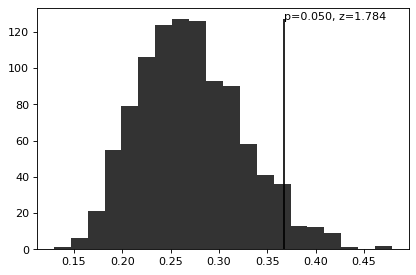

In [229]:
PlotPermutationP(Sib_Complete, np.mean(complete_cohes), title="", xlabel="")

In [245]:
0.36/0.38

0.9473684210526315

In [290]:
# ExpMatch 
InputDir = "dat/cont.bias/ASD.MetaMatch.Spec.bias.{}.csv"
Mat_Complete, Mat_Local, Mat_Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
    g, g_local_cartesian, g_distal_cartesian, EdgeWeightsDict, Weighted, Directed)
print("Total  % .3f"% np.mean(Mat_Complete))
print("Local  % .3f"% np.mean(Mat_Local))
print("Distal % .3f"% np.mean(Mat_Distal))

NameError: name 'g_distal_cartesian' is not defined

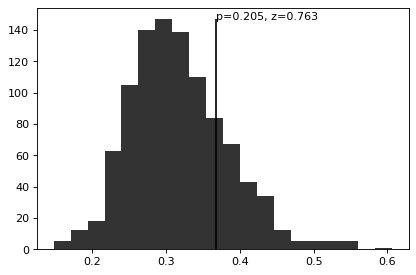

In [231]:
PlotPermutationP(Mat_Complete, np.mean(complete_cohes), title="", xlabel="")

In [93]:
print("vs. Sib", mannwhitneyu(complete_cohes, Sib_Complete))
print("vs. Mat", mannwhitneyu(complete_cohes, Mat_Complete))

vs. Sib MannwhitneyuResult(statistic=13078.0, pvalue=6.101877774337418e-09)
vs. Mat MannwhitneyuResult(statistic=19364.0, pvalue=0.003540588992347078)


In [252]:
Sib_Complete.shape
new_dat = []
for i in range(Sib_Complete.shape[0]):
    sorted_values = sorted(Sib_Complete[i])
    new_dat.append(sorted_values)
new_dat = np.array(new_dat)
print(new_dat.shape)

(1000, 50)


In [294]:
Sib_Distal = np.array(Sib_Distal)
Sib_Distal.shape
new_dat_distal = []
for i in range(Sib_Distal.shape[0]):
    sorted_values = sorted(Sib_Distal[i])
    new_dat_distal.append(sorted_values)
new_dat_distal = np.array(new_dat_distal)
print(new_dat_distal.shape)

(1000, 50)


In [295]:
pesudo_dist = np.mean(new_dat_distal, axis=0)
print(pesudo_dist.shape)

(50,)


In [296]:
print("vs. Sib", mannwhitneyu(complete_cohes, pesudo_dist))

vs. Sib MannwhitneyuResult(statistic=539.0, pvalue=4.836865913597071e-07)


In [297]:
print("vs. Sib", mannwhitneyu(dist_cohes, pesudo_dist))

vs. Sib MannwhitneyuResult(statistic=816.0, pvalue=0.0014010634046063496)


In [286]:
Local_adjmat_cartesian = pd.read_csv("../dat/allen-mouse-conn/adj_mat_cartesian_local.csv", index_col=0)
Global_adjmat_cartesian = pd.read_csv("../dat/allen-mouse-conn/adj_mat_cartesian_distal.csv", index_col=0)
g_local_cartesian = LoadConnectome2(Local_adjmat_cartesian)
g_global_cartesian = LoadConnectome2(Global_adjmat_cartesian)

In [298]:
Pvalues = []
for i in range(Sib_Distal.shape[0]):
    t, p = mannwhitneyu(dist_cohes, Sib_Distal[i])
    Pvalues.append(p)

(array([ 279.,  480.,  658.,  801.,  893.,  949.,  975.,  991.,  998.,
        1000.]),
 array([ 0.30103   ,  1.58132766,  2.86162532,  4.14192299,  5.42222065,
         6.70251832,  7.98281598,  9.26311364, 10.54341131, 11.82370897,
        13.10400664]),
 <a list of 10 Patch objects>)

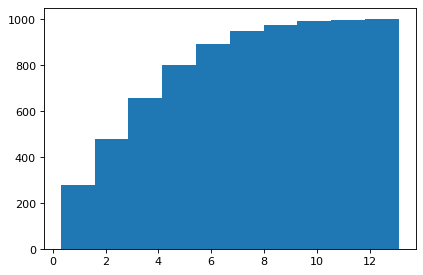

In [304]:
plt.hist(-np.log10(Pvalues), cumulative=True)

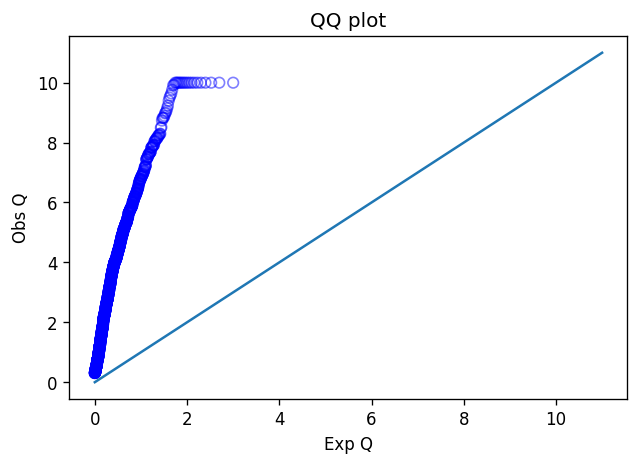

In [301]:
QQplot(Pvalues)

###### 1.2 Binary & Directed 

In [7]:
# ASD
Weighted, Directed = False, True
complete_cohes, local_cohes, dist_cohes = Complete_Local_Distal_Cohesivesness_TopN_Case(SparkMeta, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total   % .3f"% np.mean(complete_cohes))
print("Local   % .3f"% np.mean(local_cohes))
print("Distal  % .3f"% np.mean(dist_cohes))

Total    0.485
Local    0.588
Distal   0.438


In [8]:
# Sibling Subsamples
InputDir = "dat/cont.sib.bias/ASD.sib.Spec.bias.{}.csv"
Complete, Local, Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.366
Local   0.407
Distal  0.350


In [9]:
# ExpMatch 
InputDir = "dat/cont.bias/ASD.MetaMatch.Spec.bias.{}.csv"
Complete, Local, Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.411
Local   0.486
Distal  0.369


###### 1.3 Weighted 

In [232]:
# ASD
Weighted, Directed = True, False
complete_cohes, local_cohes, dist_cohes = Complete_Local_Distal_Cohesivesness_TopN_Case(SparkMeta, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total   % .3f"% np.mean(complete_cohes))
print("Local   % .3f"% np.mean(local_cohes))
print("Distal  % .3f"% np.mean(dist_cohes))

Total    0.378
Local    0.522
Distal   0.310


In [235]:
# Sibling Subsamples
InputDir = "dat/cont.sib.bias/ASD.sib.Spec.bias.{}.csv"
Complete, Local, Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.275
Local   0.340
Distal  0.251


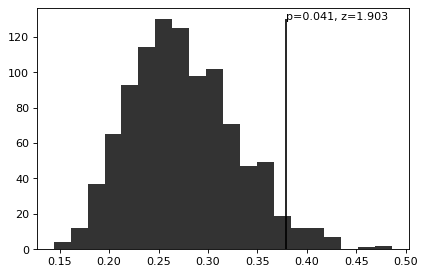

In [236]:
PlotPermutationP(Complete, np.mean(complete_cohes), title="", xlabel="")

In [237]:
# ExpMatch 
InputDir = "dat/cont.bias/ASD.MetaMatch.Spec.bias.{}.csv"
Complete, Local, Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.323
Local   0.411
Distal  0.274


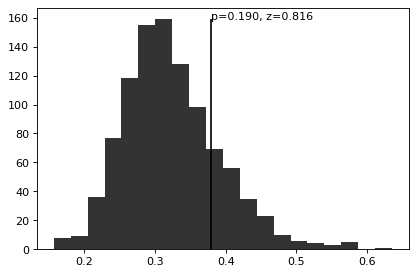

In [238]:
PlotPermutationP(Complete, np.mean(complete_cohes), title="", xlabel="")

###### 1.4 Weighted & Directed 

In [13]:
# ASD
Weighted, Directed = True, True
complete_cohes, local_cohes, dist_cohes = Complete_Local_Distal_Cohesivesness_TopN_Case(SparkMeta, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total   % .3f"% np.mean(complete_cohes))
print("Local   % .3f"% np.mean(local_cohes))
print("Distal  % .3f"% np.mean(dist_cohes))

Total    0.492
Local    0.590
Distal   0.446


In [14]:
# Sibling Subsamples
InputDir = "dat/cont.sib.bias/ASD.sib.Spec.bias.{}.csv"
Complete, Local, Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.368
Local   0.409
Distal  0.353


In [15]:
# ExpMatch 
InputDir = "dat/cont.bias/ASD.MetaMatch.Spec.bias.{}.csv"
Complete, Local, Distal = Complete_Local_Distal_Cohesiveness_TopN_Cont(InputDir, 
    g, g_local_region, g_distal_region, EdgeWeightsDict, Weighted, Directed)
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.413
Local   0.489
Distal  0.372


## 2. SA circuit cohesivneness for ASD and Matched

In [289]:
Local_adjmat_cartesian = pd.read_csv("../dat/allen-mouse-conn/adj_mat_cartesian_local.csv", index_col=0)
Global_adjmat_cartesian = pd.read_csv("../dat/allen-mouse-conn/adj_mat_cartesian_distal.csv", index_col=0)
g_local_cartesian = LoadConnectome2(Local_adjmat_cartesian)
g_global_cartesian = LoadConnectome2(Global_adjmat_cartesian)
Local_adjmat_expression = pd.read_csv("../dat/allen-mouse-conn/adj_mat_expression_local.csv", index_col=0)
Global_adjmat_expression = pd.read_csv("../dat/allen-mouse-conn/adj_mat_expression_distal.csv", index_col=0)
g_local_expression = LoadConnectome2(Local_adjmat_expression)
g_global_expression = LoadConnectome2(Global_adjmat_expression)

###### 2.1 Binary 

In [198]:
# ASD
SA_ = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.csv"
for Weighted, Directed in [(False, False), (False, True), (True, False), (True, True)]:
    print("Weighted: {} Directed: {}".format(Weighted, Directed))
    Incircuit_ = GetBestCoheSAFil(SA_, Weighted, Directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
    asd_scores_total = ScoreSTRSet(g, Incircuit_, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
    asd_scores_local_r = ScoreSTRSet(g_local_region, Incircuit_, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
    asd_scores_distal_r = ScoreSTRSet(g_distal_region, Incircuit_, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
    print("Total     % .3f"% np.mean(asd_scores_total))
    print("Local  R  % .3f"% np.mean(asd_scores_local_r))
    print("Distal R  % .3f"% np.mean(asd_scores_distal_r))
    asd_scores_local_c = ScoreSTRSet(g_local_cartesian, Incircuit_, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
    asd_scores_distal_c = ScoreSTRSet(g_global_cartesian, Incircuit_, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
    print("Local  C  % .3f"% np.mean(asd_scores_local_c))
    print("Distal C  % .3f"% np.mean(asd_scores_distal_c))
    asd_scores_local_e = ScoreSTRSet(g_local_expression, Incircuit_, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
    asd_scores_distal_e = ScoreSTRSet(g_global_expression, Incircuit_, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
    print("Local  E  % .3f"% np.mean(asd_scores_local_e))
    print("Distal E  % .3f"% np.mean(asd_scores_distal_e))


Weighted: False Directed: False
Best Cohe 0.383745229264481
Total      0.384
Local  R   0.459
Distal R   0.310
Local  C   0.455
Distal C   0.334
Local  E   0.480
Distal E   0.255
Weighted: False Directed: True
Best Cohe 0.5217283893574759
Total      0.522
Local  R   0.549
Distal R   0.472
Local  C   0.544
Distal C   0.501
Local  E   0.574
Distal E   0.393
Weighted: True Directed: False
Best Cohe 0.4049130662131712
Total      0.405
Local  R   0.471
Distal R   0.324
Local  C   0.469
Distal C   0.352
Local  E   0.504
Distal E   0.262
Weighted: True Directed: True
Best Cohe 0.537058574798158
Total      0.537
Local  R   0.553
Distal R   0.486
Local  C   0.555
Distal C   0.515
Local  E   0.590
Distal E   0.393


In [200]:
# Sibling SubSamples
for Weighted, Directed in [(False, False), (False, True), (True, False), (True, True)]:
    print("Weighted: {} Directed: {}".format(Weighted, Directed))
    Sib_Complete, Sib_Local_R, Sib_Distal_R, Sib_Local_C, Sib_Distal_C, Sib_Local_E, Sib_Distal_E = [],[],[],[],[],[],[]
    for i in range(1000):
        if not Weighted and not Directed:
            df = pd.read_csv("dat/sib.cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
        elif not Weighted and Directed:
            df = pd.read_csv("dat/sib.cont.cir.d/ASD.MetaMatch.{}.csv".format(i), names=None)
        elif Weighted and not Directed: 
            df = pd.read_csv("dat/sib.cont.cir.w/ASD.MetaMatch.{}.csv".format(i), names=None)
        elif Weighted and Directed:
            df = pd.read_csv("dat/sib.cont.cir.wd/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
        Sib_Complete.append(np.mean(complete))

        local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
        distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
        Sib_Local_R.append(np.mean(local))
        Sib_Distal_R.append(np.mean(distal))

        local = ScoreSTRSet(g_local_cartesian, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
        distal = ScoreSTRSet(g_global_cartesian, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
        Sib_Local_C.append(np.mean(local))
        Sib_Distal_C.append(np.mean(distal))

        local = ScoreSTRSet(g_local_expression, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
        distal = ScoreSTRSet(g_global_expression, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
        Sib_Local_E.append(np.mean(local))
        Sib_Distal_E.append(np.mean(distal))
    print("Total     % .3f"% np.mean(Sib_Complete))
    print("Local  R  % .3f"% np.mean(Sib_Local_R))
    print("Distal R  % .3f"% np.mean(Sib_Distal_R))
    print("Local  C  % .3f"% np.mean(Sib_Local_C))
    print("Distal C  % .3f"% np.mean(Sib_Distal_C))
    print("Local  E  % .3f"% np.mean(Sib_Local_E))
    print("Distal E  % .3f"% np.mean(Sib_Distal_E))
    

Weighted: False Directed: False
Total      0.317
Local  R   0.384
Distal R   0.278
Local  C   0.394
Distal C   0.236
Local  E   0.387
Distal E   0.237
Weighted: False Directed: True
Total      0.448
Local  R   0.484
Distal R   0.391
Local  C   0.518
Distal C   0.340
Local  E   0.492
Distal E   0.360
Weighted: True Directed: False
Total      0.328
Local  R   0.392
Distal R   0.286
Local  C   0.403
Distal C   0.241
Local  E   0.394
Distal E   0.243
Weighted: True Directed: True
Total      0.458
Local  R   0.483
Distal R   0.403
Local  C   0.524
Distal C   0.341
Local  E   0.497
Distal E   0.365


In [83]:
mannwhitneyu(asd_scores_total, Sib_Complete)

MannwhitneyuResult(statistic=356423.0, pvalue=0.00030257476023456145)

In [202]:
# Match SubSamples
for Weighted, Directed in [(False, False), (False, True), (True, False), (True, True)]:
    print("Weighted: {} Directed: {}".format(Weighted, Directed))
    Sib_Complete, Sib_Local_R, Sib_Distal_R, Sib_Local_C, Sib_Distal_C, Sib_Local_E, Sib_Distal_E = [],[],[],[],[],[],[]
    for i in range(1000):
        if not Weighted and not Directed:
            df = pd.read_csv("dat/cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
        elif not Weighted and Directed:
            df = pd.read_csv("dat/cont.cir.d/ASD.MetaMatch.{}.csv".format(i), names=None)
        elif Weighted and not Directed: 
            df = pd.read_csv("dat/cont.cir.w/ASD.MetaMatch.{}.csv".format(i), names=None)
        elif Weighted and Directed:
            df = pd.read_csv("dat/cont.cir.wd/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
        Sib_Complete.append(np.mean(complete))

        local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
        distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
        Sib_Local_R.append(np.mean(local))
        Sib_Distal_R.append(np.mean(distal))

        local = ScoreSTRSet(g_local_cartesian, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
        distal = ScoreSTRSet(g_global_cartesian, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
        Sib_Local_C.append(np.mean(local))
        Sib_Distal_C.append(np.mean(distal))

        local = ScoreSTRSet(g_local_expression, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
        distal = ScoreSTRSet(g_global_expression, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
        Sib_Local_E.append(np.mean(local))
        Sib_Distal_E.append(np.mean(distal))
    print("Total     % .3f"% np.mean(Sib_Complete))
    print("Local  R  % .3f"% np.mean(Sib_Local_R))
    print("Distal R  % .3f"% np.mean(Sib_Distal_R))
    print("Local  C  % .3f"% np.mean(Sib_Local_C))
    print("Distal C  % .3f"% np.mean(Sib_Distal_C))
    print("Local  E  % .3f"% np.mean(Sib_Local_E))
    print("Distal E  % .3f"% np.mean(Sib_Distal_E))

Weighted: False Directed: False
Total      0.364
Local  R   0.475
Distal R   0.292
Local  C   0.460
Distal C   0.246
Local  E   0.464
Distal E   0.242
Weighted: False Directed: True
Total      0.486
Local  R   0.563
Distal R   0.396
Local  C   0.572
Distal C   0.338
Local  E   0.564
Distal E   0.348
Weighted: True Directed: False
Total      0.373
Local  R   0.476
Distal R   0.298
Local  C   0.465
Distal C   0.249
Local  E   0.468
Distal E   0.246
Weighted: True Directed: True
Total      0.494
Local  R   0.566
Distal R   0.406
Local  C   0.575
Distal C   0.338
Local  E   0.569
Distal E   0.356


In [173]:
# Matches
Mat_Complete, Mat_Local, Mat_Distal = [],[],[]
for i in range(1000):
    df = pd.read_csv("dat/cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
    InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
    complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
    local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
    distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Directed)
    Mat_Complete.extend(complete)
    Mat_Local.extend(local)
    Mat_Distal.extend(distal)
print("Total  % .3f"% np.mean(Mat_Complete))
print("Local  % .3f"% np.mean(Mat_Local))
print("Distal % .3f"% np.mean(Mat_Distal))

Total   0.362
Local   0.472
Distal  0.293


In [86]:
mannwhitneyu(asd_scores_total, Mat_Complete)

MannwhitneyuResult(statistic=517760.5, pvalue=0.13445152875943156)

###### 2.2 Binary & Directed 

In [165]:
sim = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.D.csv")
Weighted = False; Direction = True
candidates = sim.columns.values
Cohes = []
res = {}
for i, row in sim.iterrows():
    state = row.values
    InCirtuitNodes = candidates[np.where(state==1)[0]]
    InCirtuitNodes_str = ",".join(InCirtuitNodes)
    if InCirtuitNodes_str not in res:
        res[InCirtuitNodes_str] = 1
    else:
        res[InCirtuitNodes_str] += 1
    score = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
    Cohes.append(score)
best_id = np.argmax(Cohes)
state = sim.loc[1, :].values
InCirtuitNodes = candidates[np.where(state==1)[0]]

CandidateSTRs = meta_jon.head(50).index.values
asd_scores_total = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
asd_scores_local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict_local_region, Weighted=Weighted, Direction=Direction)
asd_scores_distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict_distal_region, Weighted=Weighted, Direction=Direction)
print("Total     % .3f"% np.mean(asd_scores_total))
print("Local     % .3f"% np.mean(asd_scores_local))
print("Distal    % .3f"% np.mean(asd_scores_distal))

Total      0.521
Local      0.571
Distal     0.465


In [166]:
Complete, Local, Distal = [], [], []
All_Complete, All_Local, All_Distal = [],[],[]
for i in range(1000):
    df = pd.read_csv("dat/cont.cir.d/ASD.MetaMatch.{}.csv".format(i), names=None)
    InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
    complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
    local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict_local_region, Weighted=Weighted, Direction=Direction)
    distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict_distal_region, Weighted=Weighted, Direction=Direction)
    All_Complete.extend(complete)
    All_Local.extend(local)
    All_Distal.extend(distal)
    Complete.append(np.mean(complete))
    Local.append(np.mean(local))
    Distal.append(np.mean(distal))
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.489
Local   0.569
Distal  0.396


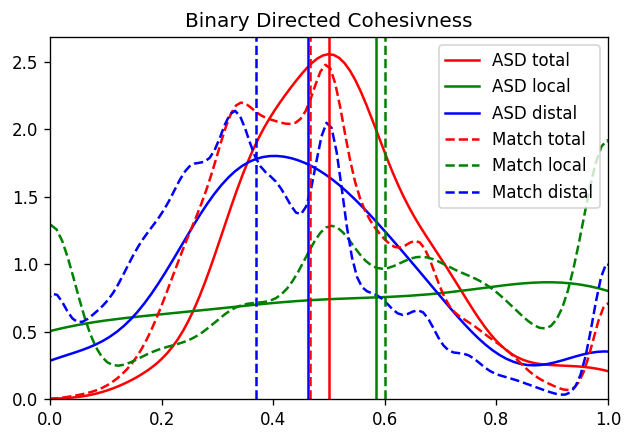

In [167]:
fig = plt.figure(dpi=120)
colors = ["red", "green", "blue"]
sns.distplot(a=asd_scores_total, hist=False, label="ASD total", color=colors[0])
sns.distplot(a=asd_scores_local, hist=False, label="ASD local", color=colors[1])
sns.distplot(a=asd_scores_distal, hist=False, label="ASD distal", color=colors[2])
sns.distplot(a=All_Complete, hist=False, label="Match total", color=colors[0], kde_kws={'linestyle':'--'})
sns.distplot(a=All_Local, hist=False, label="Match local", color=colors[1], kde_kws={'linestyle':'--'})
sns.distplot(a=All_Distal, hist=False, label="Match distal", color=colors[2], kde_kws={'linestyle':'--'})

plt.axvline(x=np.median(asd_scores_total), c=colors[0])
plt.axvline(x=np.median(asd_scores_local), c=colors[1])
plt.axvline(x=np.median(asd_scores_distal), c=colors[2])
plt.axvline(x=np.median(All_Complete), linestyle="--", c=colors[0])
plt.axvline(x=np.median(All_Local), linestyle="--", c=colors[1])
plt.axvline(x=np.median(All_Distal), linestyle="--", c=colors[2])

plt.title("Binary Directed Cohesivness")
plt.xlim((0,1))
plt.show()

###### 2.3 Weighted 

In [168]:
sim = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.W.csv")
Weighted = True; Direction = False
candidates = sim.columns.values
Cohes = []
res = {}
for i, row in sim.iterrows():
    state = row.values
    InCirtuitNodes = candidates[np.where(state==1)[0]]
    InCirtuitNodes_str = ",".join(InCirtuitNodes)
    if InCirtuitNodes_str not in res:
        res[InCirtuitNodes_str] = 1
    else:
        res[InCirtuitNodes_str] += 1
    score = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
    Cohes.append(score)
best_id = np.argmax(Cohes)
state = sim.loc[1, :].values
InCirtuitNodes = candidates[np.where(state==1)[0]]

CandidateSTRs = meta_jon.head(50).index.values
asd_scores_total = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
asd_scores_local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict_local_region, Weighted=Weighted, Direction=Direction)
asd_scores_distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict_distal_region, Weighted=Weighted, Direction=Direction)
print("Total     % .3f"% np.mean(asd_scores_total))
print("Local     % .3f"% np.mean(asd_scores_local))
print("Distal    % .3f"% np.mean(asd_scores_distal))

Total      0.399
Local      0.510
Distal     0.309


In [169]:
Complete, Local, Distal = [], [], []
All_Complete, All_Local, All_Distal = [],[],[]
for i in range(1000):
    df = pd.read_csv("dat/cont.cir.w/ASD.MetaMatch.{}.csv".format(i), names=None)
    InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
    complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
    local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict_local_region, Weighted=Weighted, Direction=Direction)
    distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict_distal_region, Weighted=Weighted, Direction=Direction)
    All_Complete.extend(complete)
    All_Local.extend(local)
    All_Distal.extend(distal)
    Complete.append(np.mean(complete))
    Local.append(np.mean(local))
    Distal.append(np.mean(distal))
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.375
Local   0.483
Distal  0.298


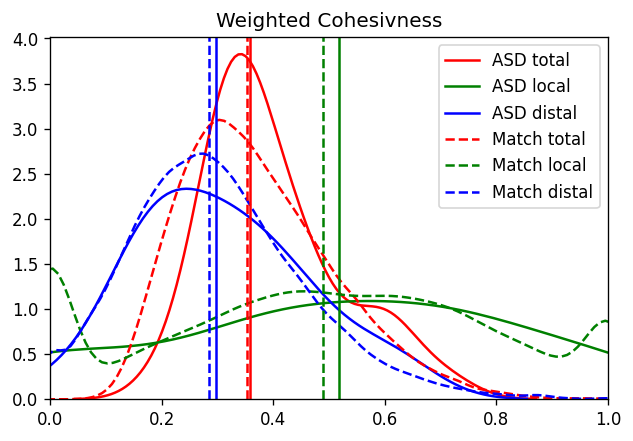

In [170]:
fig = plt.figure(dpi=120)
colors = ["red", "green", "blue"]
sns.distplot(a=asd_scores_total, hist=False, label="ASD total", color=colors[0])
sns.distplot(a=asd_scores_local, hist=False, label="ASD local", color=colors[1])
sns.distplot(a=asd_scores_distal, hist=False, label="ASD distal", color=colors[2])
sns.distplot(a=All_Complete, hist=False, label="Match total", color=colors[0], kde_kws={'linestyle':'--'})
sns.distplot(a=All_Local, hist=False, label="Match local", color=colors[1], kde_kws={'linestyle':'--'})
sns.distplot(a=All_Distal, hist=False, label="Match distal", color=colors[2], kde_kws={'linestyle':'--'})

plt.axvline(x=np.median(asd_scores_total), c=colors[0])
plt.axvline(x=np.median(asd_scores_local), c=colors[1])
plt.axvline(x=np.median(asd_scores_distal), c=colors[2])
plt.axvline(x=np.median(All_Complete), linestyle="--", c=colors[0])
plt.axvline(x=np.median(All_Local), linestyle="--", c=colors[1])
plt.axvline(x=np.median(All_Distal), linestyle="--", c=colors[2])

plt.title("Weighted Cohesivness")
plt.xlim((0,1))
plt.show()

###### 2.4 Weighted & Directed 

In [171]:
sim = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.WD.csv")
Weighted = True; Direction = True
candidates = sim.columns.values
Cohes = []
res = {}
for i, row in sim.iterrows():
    state = row.values
    InCirtuitNodes = candidates[np.where(state==1)[0]]
    InCirtuitNodes_str = ",".join(InCirtuitNodes)
    if InCirtuitNodes_str not in res:
        res[InCirtuitNodes_str] = 1
    else:
        res[InCirtuitNodes_str] += 1
    score = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
    Cohes.append(score)
best_id = np.argmax(Cohes)
state = sim.loc[1, :].values
InCirtuitNodes = candidates[np.where(state==1)[0]]

CandidateSTRs = meta_jon.head(50).index.values
asd_scores_total = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
asd_scores_local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict_local_region, Weighted=Weighted, Direction=Direction)
asd_scores_distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict_distal_region, Weighted=Weighted, Direction=Direction)
print("Total     % .3f"% np.mean(asd_scores_total))
print("Local     % .3f"% np.mean(asd_scores_local))
print("Distal    % .3f"% np.mean(asd_scores_distal))

Total      0.536
Local      0.568
Distal     0.492


In [172]:
Complete, Local, Distal = [], [], []
All_Complete, All_Local, All_Distal = [],[],[]
for i in range(1000):
    df = pd.read_csv("dat/cont.cir.wd/ASD.MetaMatch.{}.csv".format(i), names=None)
    InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
    complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
    local = ScoreSTRSet(g_local_region, InCirtuitNodes, EdgeWeightsDict_local_region, Weighted=Weighted, Direction=Direction)
    distal = ScoreSTRSet(g_distal_region, InCirtuitNodes, EdgeWeightsDict_distal_region, Weighted=Weighted, Direction=Direction)
    All_Complete.extend(complete)
    All_Local.extend(local)
    All_Distal.extend(distal)
    Complete.append(np.mean(complete))
    Local.append(np.mean(local))
    Distal.append(np.mean(distal))
print("Total  % .3f"% np.mean(Complete))
print("Local  % .3f"% np.mean(Local))
print("Distal % .3f"% np.mean(Distal))

Total   0.496
Local   0.573
Distal  0.406


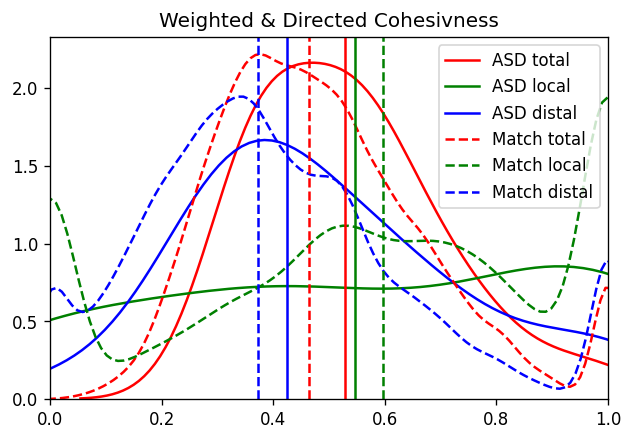

In [173]:
fig = plt.figure(dpi=120)
colors = ["red", "green", "blue"]
sns.distplot(a=asd_scores_total, hist=False, label="ASD total", color=colors[0])
sns.distplot(a=asd_scores_local, hist=False, label="ASD local", color=colors[1])
sns.distplot(a=asd_scores_distal, hist=False, label="ASD distal", color=colors[2])
sns.distplot(a=All_Complete, hist=False, label="Match total", color=colors[0], kde_kws={'linestyle':'--'})
sns.distplot(a=All_Local, hist=False, label="Match local", color=colors[1], kde_kws={'linestyle':'--'})
sns.distplot(a=All_Distal, hist=False, label="Match distal", color=colors[2], kde_kws={'linestyle':'--'})

plt.axvline(x=np.median(asd_scores_total), c=colors[0])
plt.axvline(x=np.median(asd_scores_local), c=colors[1])
plt.axvline(x=np.median(asd_scores_distal), c=colors[2])
plt.axvline(x=np.median(All_Complete), linestyle="--", c=colors[0])
plt.axvline(x=np.median(All_Local), linestyle="--", c=colors[1])
plt.axvline(x=np.median(All_Distal), linestyle="--", c=colors[2])

plt.title("Weighted & Directed Cohesivness")
plt.xlim((0,1))
plt.show()

## 3.

In [175]:
sim = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.csv")
Weighted = False; Direction = False
candidates = sim.columns.values
Cohes = []
res = {}
for i, row in sim.iterrows():
    state = row.values
    InCirtuitNodes = candidates[np.where(state==1)[0]]
    InCirtuitNodes_str = ",".join(InCirtuitNodes)
    if InCirtuitNodes_str not in res:
        res[InCirtuitNodes_str] = 1
    else:
        res[InCirtuitNodes_str] += 1
    score = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)
    Cohes.append(score)
best_id = np.argmax(Cohes)
state = sim.loc[1, :].values
InCirtuitNodes = candidates[np.where(state==1)[0]]

In [53]:
CircuitCandidates = []
for i, (k, v) in enumerate(res.items()):
    InCirtuitNodes = k.split(",")
    CircuitCandidates.append(InCirtuitNodes)
    score = np.mean(ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction))
    print("%d   Cohe: %.3f %d" % (i, score, v))

0   Cohe: 0.400 70
1   Cohe: 0.395 10
2   Cohe: 0.399 13
3   Cohe: 0.405 3
4   Cohe: 0.407 2
5   Cohe: 0.403 2


In [45]:
CircuitCandidates = []
for k, v in res.items():
    #print(k)
    InCirtuitNodes = k.split(",")
    print(np.mean(ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=Direction)))
    print(v)

0.5534149459722119
41
0.5433615466728854
20
0.5376593762052718
26
0.5269524874464796
13


## 4. Other Def of Distance

### 4.1 Cartesian 

##### 4.1.0 preprocessing

In [198]:
Cartesian_distances = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv",
                                   index_col=0)

In [194]:
# Mask Mat2 according to values in Mat1
def MaskDistMat(Mat1, Mat2, cutoff, m='lt'):
    New_Mat2 = Mat2.copy(deep=True)
    for STR_i in Mat1.index.values:
        for STR_j in Mat1.columns.values:
            if m == 'gt':
                if Mat1.loc[STR_i, STR_j] >= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
            elif m == "lt":
                if Mat1.loc[STR_i, STR_j] <= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
    return New_Mat2

In [195]:
Cartesian_distances_w_edge = MaskDistMat(adj_mat, Cartesian_distances, cutoff=0)

TypeError: copy() takes no keyword arguments

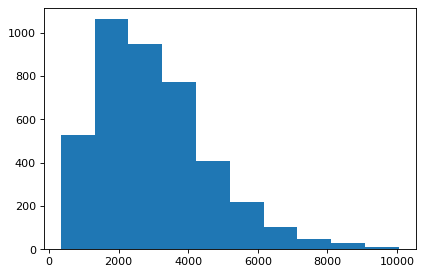

2750.738536606747


In [196]:
Cartesian_distances = [x for x in Cartesian_distances_w_edge.values.flatten() if x > 0]
Cartesian_distances_deciles = np.percentile(Cartesian_distances, np.arange(0, 100, 10))
plt.hist(Cartesian_distances)
plt.show()
print(np.median(Cartesian_distances))

In [213]:
# Cut at 50% decile
Hippo = ["Dentate_gyrus", "Field_CA1", "Field_CA2", "Field_CA3"]
maxx = 0
for str1, str2 in itertools.product(Hippo, Hippo):
    #print(str1, str2)
    dist = Cartesian_distances.loc[str1, str2]
    if dist > maxx:
        maxx = dist
maxx

1349.0737563232042

In [205]:
Cartesian_distances.loc["Field_CA1", "Field_CA3"]

1250.9996003196804

In [86]:
Cartesian_distances_deciles
print([round(x, 2) for x in Cartesian_distances_deciles])

[333.54, 1186.04, 1563.65, 1971.99, 2342.11, 2750.74, 3183.41, 3649.83, 4199.02, 5153.08]


In [215]:
def MaskDistMat_xx(distance_mat, Conn_mat, cutoff, keep='gt'):
    Conn_mat_new = Conn_mat.copy(deep=True)
    distance_mat_new = distance_mat.copy(deep=True)
    for STR_i in distance_mat.index.values:
        for STR_j in distance_mat.columns.values:
            if keep == 'gt':
                if distance_mat.loc[STR_i, STR_j] >= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0
            elif keep == "lt":
                if distance_mat.loc[STR_i, STR_j] <= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0                
    return Conn_mat_new, distance_mat_new

In [216]:
#Local_adjmat_cartesian, _ = MaskDistMat_xx(Cartesian_distances_w_edge, adj_mat, cutoff=2750.738536606747, keep='lt')
glocal_adjmat_cartesian, _ = MaskDistMat_xx(Cartesian_distances_w_edge, adj_mat, cutoff=1300, keep='gt')
#Local_adjmat_cartesian.to_csv("../dat/allen-mouse-conn/adj_mat_cartesian_local.csv")
glocal_adjmat_cartesian.to_csv("../dat/allen-mouse-conn/adj_mat_cartesian_distal.cut1300.csv")

In [ ]:
for i in range(10):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distances_w_edge, adj_mat, 
                                                cutoff=Cartesian_distances_deciles[i])
    print(Cartesian_distances_deciles[i])
    print(np.min(distance_mat_new.values), np.max(distance_mat_new.values))
    distance_mat_new.to_csv("../dat/allen-mouse-conn/cartesian_deciles_limit_{}.csv".format(i))

In [88]:
graph_mats_cartesians = []
for i in range(10):
    xx = pd.read_csv("../dat/allen-mouse-conn/cartesian_deciles_limit_{}.csv".format(i), index_col=0)
    g_ = LoadConnectome2(xx)
    graph_mats_cartesians.append(g_)

##### 4.1.1 Unweighted, Undirected

In [89]:
SA_binary = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.csv"
weighted = False; directed = False
Incircuit_binary = GetBestCoheSAFil(SA_binary, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)

In [90]:
Cartesian_asd_scores_deciles = []
for g_ in graph_mats_cartesians:
    asd_scores_decile = ScoreSTRSet(g_, Incircuit_binary, EdgeWeightsDict, Weighted=weighted, Direction=directed)
    Cartesian_asd_scores_deciles.append(np.mean(asd_scores_decile))

In [91]:
Match_Cartesian_match_scores_deciles = []
for g_ in graph_mats_cartesians:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Match_Cartesian_match_scores_deciles.append(avg)

In [92]:
Sib_Cartesian_scores_deciles = []
for g_ in graph_mats_cartesians:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/sib.cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Sib_Cartesian_scores_deciles.append(avg)

In [93]:
print(Cartesian_asd_scores_deciles)
print(Match_Cartesian_match_scores_deciles)
print(Sib_Cartesian_scores_deciles)

[0.383745229264481, 0.35709452765416216, 0.3325527989749504, 0.3273034129901533, 0.32189549797231704, 0.3335013402414713, 0.32396058780189635, 0.3213829667210361, 0.25846758991495833, 0.2183596009253904]
[0.36415218426412843, 0.33613536978073283, 0.31516339015255135, 0.293755632628427, 0.2698452097904861, 0.24609197292437648, 0.22259366639571473, 0.19916927847012214, 0.1741424231664572, 0.12193484241883384]
[0.3169615404276532, 0.2948178120973314, 0.2814146275227652, 0.26798747209933094, 0.25295606083163286, 0.23585719855137782, 0.20987986971289233, 0.1914123784299706, 0.1612269158216472, 0.09701907424240051]


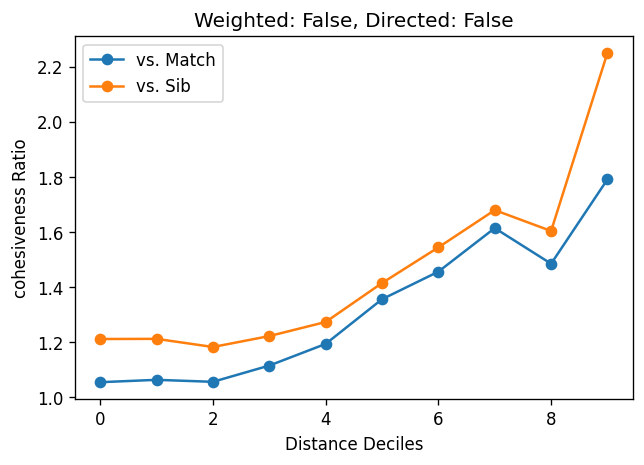

In [94]:
plt.figure(dpi=120)
res = []
for x,y in zip(Cartesian_asd_scores_deciles, Match_Cartesian_match_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
plt.plot(range(0,10,1), res, marker='o', label="vs. Match")

res = []
for x,y in zip(Cartesian_asd_scores_deciles, Sib_Cartesian_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
plt.plot(range(0,10,1), res, marker='o', label="vs. Sib")

plt.xlabel("Distance Deciles")
plt.ylabel("cohesiveness Ratio")
plt.title("Weighted: {}, Directed: {}".format(weighted, directed))
plt.legend()
plt.show()

##### 4.1.2 Binary, Directed

In [95]:
SA_binary = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.d.csv"
weighted = False; directed = True
Incircuit_binary = GetBestCoheSAFil(SA_binary, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
Cartesian_asd_scores_deciles = []
for g_ in graph_mats_cartesians:
    asd_scores_decile = ScoreSTRSet(g_, Incircuit_binary, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
    Cartesian_asd_scores_deciles.append(np.mean(asd_scores_decile))

In [96]:
Cartesian_match_scores_deciles = []
for g_ in graph_mats_cartesians:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/cont.cir.d/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Cartesian_match_scores_deciles.append(avg)

FileNotFoundError: [Errno 2] File b'dat/cont.cir.d/ASD.MetaMatch.0.csv' does not exist: b'dat/cont.cir.d/ASD.MetaMatch.0.csv'

In [ ]:
res = []
for x,y in zip(Cartesian_asd_scores_deciles, Cartesian_match_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
print(res)
plt.plot(range(0,10,1), res, marker='o')
plt.xlabel("Deciles")
plt.ylabel("Cohe")
plt.show()

##### 4.1.3 Weighted

In [97]:
SA_binary = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.w.csv"
weighted = True; directed = False
Incircuit_binary = GetBestCoheSAFil(SA_binary, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
Cartesian_asd_scores_deciles = []
for g_ in graph_mats_cartesians:
    asd_scores_decile = ScoreSTRSet(g_, Incircuit_binary, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
    Cartesian_asd_scores_deciles.append(np.mean(asd_scores_decile))

In [98]:
Cartesian_match_scores_deciles = []
for g_ in graph_mats_cartesians:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/cont.cir.w/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Cartesian_match_scores_deciles.append(avg)

[1.0630151795988452, 1.073999468080256, 1.0680238575855256, 1.12647022018686, 1.2002580184911036, 1.3667849771994658, 1.4799406082556623, 1.6235259972874594, 1.4946045416815876, 2.0281537453338547]


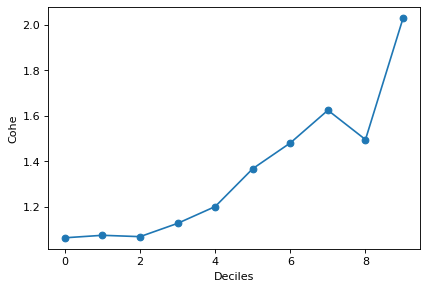

In [99]:
res = []
for x,y in zip(Cartesian_asd_scores_deciles, Cartesian_match_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
print(res)
plt.plot(range(0,10,1), res, marker='o')
plt.xlabel("Deciles")
plt.ylabel("Cohe")
plt.show()

##### 4.1.4 Weighted, Directed

In [100]:
SA_wd = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.wd.csv"
weighted = True; directed = True
Incircuit_wd = GetBestCoheSAFil(SA_wd, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
Cartesian_asd_scores_deciles = []
for g_ in graph_mats_cartesians:
    asd_scores_decile = ScoreSTRSet(g_, Incircuit_wd, EdgeWeightsDict, Weighted=weighted, Direction=directed)
    Cartesian_asd_scores_deciles.append(np.mean(asd_scores_decile))

In [101]:
Match_Cartesian_match_scores_deciles = []
for g_ in graph_mats_cartesians:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Match_Cartesian_match_scores_deciles.append(avg)

In [102]:
Sib_Cartesian_scores_deciles = []
for g_ in graph_mats_cartesians:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/sib.cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Sib_Cartesian_scores_deciles.append(avg)

In [103]:
print(Cartesian_asd_scores_deciles)
print(Match_Cartesian_match_scores_deciles)
print(Sib_Cartesian_scores_deciles)

[0.5399828339954055, 0.5098345623314076, 0.47469833317974236, 0.47660343520877513, 0.4902427980320393, 0.5268242653201802, 0.4976729602758186, 0.4460254139295708, 0.40390324442254993, 0.3183851856504303]
[0.47327078162197267, 0.4463612194084443, 0.4302683273645054, 0.40936748143204804, 0.38318595699102664, 0.35922917744359695, 0.32539485496016834, 0.2861050250899575, 0.23984261335373566, 0.1570595601759581]
[0.422796023103852, 0.3992085547183776, 0.3889003889669614, 0.37626775048072997, 0.3662828791126562, 0.3495394028542153, 0.30769807640443264, 0.27121338864558625, 0.22215216769867407, 0.12250830662785148]


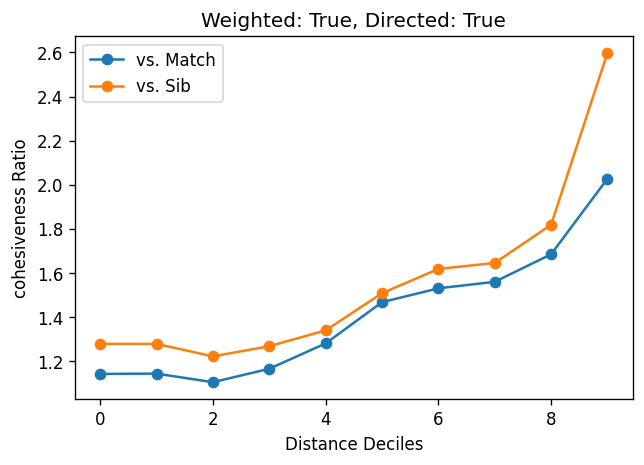

In [104]:
plt.figure(dpi=120)
res = []
for x,y in zip(Cartesian_asd_scores_deciles, Match_Cartesian_match_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
plt.plot(range(0,10,1), res, marker='o', label="vs. Match")

res = []
for x,y in zip(Cartesian_asd_scores_deciles, Sib_Cartesian_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
plt.plot(range(0,10,1), res, marker='o', label="vs. Sib")

plt.xlabel("Distance Deciles")
plt.ylabel("cohesiveness Ratio")
plt.title("Weighted: {}, Directed: {}".format(weighted, directed))
plt.legend()
plt.show()

In [ ]:
Incircuit_wd = np.append(Incircuit_wd, ["Parafascicular_nucleus", "Caudoputamen"])

In [ ]:
xx_cir = adj_mat.loc[Incircuit_wd, Incircuit_wd]

In [ ]:
conn_str, conn_reg = queryDist(xx_cir, Cartesian_distances_w_edge, dist_min=5000, dist_max=1e6, directed=False)

In [ ]:
conn_str

In [ ]:
dat = []
for str_i in xx_cir.index.values:
    source = str_i
    source_region = str2reg[source]
    for str_j in xx_cir.index.values:
        target = str_j
        target_region = str2reg[target]
        if xx_cir.loc[str_i, str_j] != 0:
            weight = xx_cir.loc[str_i, str_j]
            dist_car = Cartesian_distances_w_edge.loc[str_i, str_j]
            dist_exp = Exp_distances_w_edge.loc[str_i, str_j]
            row = [source, target, source_region, target_region, weight, dist_car, dist_exp]
            dat.append(row)
df = pd.DataFrame(data=dat, columns=["source", "target", "source_region", "target_region", 
                                     "weight", "dist_car", "dist_exp"])

In [ ]:
df.to_excel("dat/circuit_connections.xlsx")

### 4.2 Expression Distance

#### 4.2.0 PreProcessing

In [185]:
Exp_distances = pd.read_csv("../dat/allen-mouse-conn/Dist_ExpressionCorrelation.csv",
                                   index_col="ROW")

In [186]:
def MaskDistMat(Mat1, Mat2, cutoff):
    New_Mat2 = Mat2.copy(deep=True)
    for STR_i in Mat1.index.values:
        for STR_j in Mat1.columns.values:
            if Mat1.loc[STR_i, STR_j] <= cutoff:
                New_Mat2.loc[STR_i, STR_j] = 0
            else:
                New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
    return New_Mat2
Exp_distances_w_edge = MaskDistMat(adj_mat, Exp_distances, cutoff=0)

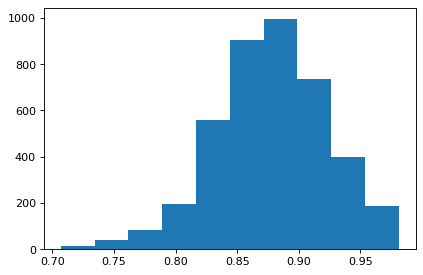

0.8778422228476654


In [187]:
Exp_distances = [x for x in Exp_distances_w_edge.values.flatten() if x > 0]
Exp_distances_deciles = np.percentile(Exp_distances, np.arange(0, 100, 10))
plt.hist(Exp_distances)
plt.show()
print(np.median(Exp_distances))

In [188]:
[round(x, 3) for x in Exp_distances_deciles]

[0.707, 0.822, 0.842, 0.855, 0.867, 0.878, 0.889, 0.901, 0.916, 0.937]

In [189]:
def MaskDistMat_xx(distance_mat, Conn_mat, cutoff, keep='gt'):
    Conn_mat_new = Conn_mat.copy(deep=True)
    distance_mat_new = distance_mat.copy(deep=True)
    for STR_i in distance_mat.index.values:
        for STR_j in distance_mat.columns.values:
            if keep == 'gt':
                if distance_mat.loc[STR_i, STR_j] >= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0
            elif keep == "lt":
                if distance_mat.loc[STR_i, STR_j] <= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0                
    return Conn_mat_new, distance_mat_new


In [191]:
Local_adjmat_expression, _ = MaskDistMat_xx(Exp_distances_w_edge, adj_mat, cutoff=0.8778422228476654, keep='gt')
glocal_adjmat_expression, _ = MaskDistMat_xx(Exp_distances_w_edge, adj_mat, cutoff=0.8778422228476654, keep='lt')
Local_adjmat_expression.to_csv("../dat/allen-mouse-conn/adj_mat_expression_local.csv")
glocal_adjmat_expression.to_csv("../dat/allen-mouse-conn/adj_mat_expression_distal.csv")

In [ ]:
for i in range(10):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Exp_distances_w_edge, adj_mat, 
                                                cutoff=Exp_distances_deciles[i])
    print(Exp_distances_deciles[i])
    print(np.min(distance_mat_new.values), np.max(distance_mat_new.values))
    distance_mat_new.to_csv("../dat/allen-mouse-conn/expression_deciles_limit_{}.csv".format(i))

In [248]:
graph_mats_expression = []
for i in range(10):
    xx = pd.read_csv("../dat/allen-mouse-conn/expression_deciles_limit_{}.csv".format(i), index_col=0)
    g_ = LoadConnectome2(xx)
    graph_mats_expression.append(g_)

#### 4.1.1 Unweighted, Undirected

[1.0430886924431364, 1.0443016818577602, 1.0910144715802914, 1.1140237532387256, 1.1176374614898124, 1.0718384828580259, 1.0862335497387607, 1.077289235070506, 1.0990777497880306, 1.1279490268792116]


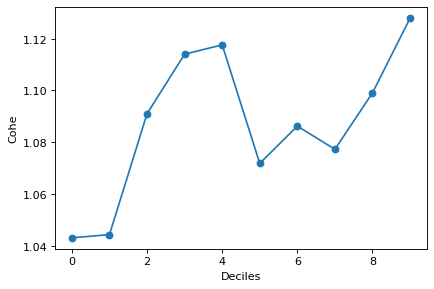

In [250]:
SA_binary = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.csv"
weighted = False; directed = False
Incircuit_binary = GetBestCoheSAFil(SA_binary, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
Expression_asd_scores_deciles = []
for g_ in graph_mats_expression:
    asd_scores_decile = ScoreSTRSet(g_, Incircuit_binary, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
    Expression_asd_scores_deciles.append(np.mean(asd_scores_decile))

Expression_match_scores_deciles = []
for g_ in graph_mats_expression:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Expression_match_scores_deciles.append(avg)
    
res = []
for x,y in zip(Expression_asd_scores_deciles, Expression_match_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
print(res)
plt.plot(range(0,10,1), res, marker='o')
plt.xlabel("Deciles")
plt.ylabel("Cohe")
plt.show()

#### 4.1.2 Binary Directed

[1.0648053681507526, 1.0688021012707025, 1.1048333841061644, 1.079758075112067, 1.0821763325897762, 1.0694438634471353, 1.0647042103769475, 1.1153504622698545, 1.108028056500627, 1.174724319659951]


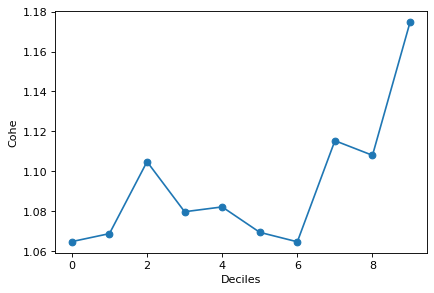

In [251]:
SA_binary = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.d.csv"
weighted = False; directed = True
Incircuit_binary = GetBestCoheSAFil(SA_binary, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
Expression_asd_scores_deciles = []
for g_ in graph_mats_expression:
    asd_scores_decile = ScoreSTRSet(g_, Incircuit_binary, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
    Expression_asd_scores_deciles.append(np.mean(asd_scores_decile))

Expression_match_scores_deciles = []
for g_ in graph_mats_expression:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/cont.cir.d/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Expression_match_scores_deciles.append(avg)
    
res = []
for x,y in zip(Expression_asd_scores_deciles, Expression_match_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
print(res)
plt.plot(range(0,10,1), res, marker='o')
plt.xlabel("Deciles")
plt.ylabel("Cohe")
plt.show()

#### 4.1.3 Weighted 

[1.0457289345533043, 1.0469797975428954, 1.0926136646147584, 1.1088659421764404, 1.1135785692846132, 1.0749846615448324, 1.0822820013688699, 1.0632670445388441, 1.0968930077815997, 1.147676876774687]


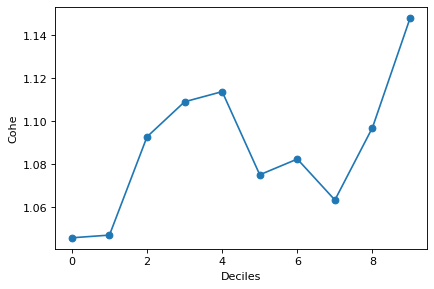

In [252]:
SA_binary = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.w.csv"
weighted = True; directed = False
Incircuit_binary = GetBestCoheSAFil(SA_binary, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
Expression_asd_scores_deciles = []
for g_ in graph_mats_expression:
    asd_scores_decile = ScoreSTRSet(g_, Incircuit_binary, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
    Expression_asd_scores_deciles.append(np.mean(asd_scores_decile))

Expression_match_scores_deciles = []
for g_ in graph_mats_expression:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/cont.cir.w/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Expression_match_scores_deciles.append(avg)
    
res = []
for x,y in zip(Expression_asd_scores_deciles, Expression_match_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
print(res)
plt.plot(range(0,10,1), res, marker='o')
plt.xlabel("Deciles")
plt.ylabel("Cohe")
plt.show()

#### 4.1.4 Weighted Directed

[1.0666197191433084, 1.0723538120345568, 1.10651959885838, 1.0808482547138374, 1.0772449981585908, 1.0627345773971786, 1.0500340730115756, 1.0829401430672776, 1.0671493308755582, 1.1310648832984864]


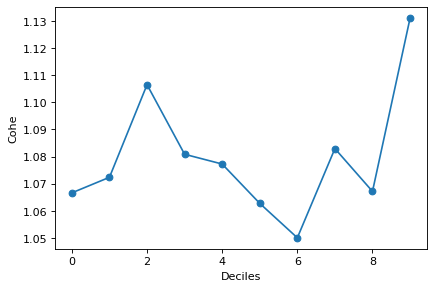

In [253]:
SA_binary = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.wd.csv"
weighted = True; directed = True
Incircuit_binary = GetBestCoheSAFil(SA_binary, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
Expression_asd_scores_deciles = []
for g_ in graph_mats_expression:
    asd_scores_decile = ScoreSTRSet(g_, Incircuit_binary, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
    Expression_asd_scores_deciles.append(np.mean(asd_scores_decile))

Expression_match_scores_deciles = []
for g_ in graph_mats_expression:
    avg = []
    for i in range(1000):
        df = pd.read_csv("dat/cont.cir.wd/ASD.MetaMatch.{}.csv".format(i), names=None)
        InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
        scores = ScoreSTRSet(g_, InCirtuitNodes, EdgeWeightsDict, Weighted=Weighted, Direction=directed)
        avg.append(np.mean(scores))
    avg = np.mean(avg)
    Expression_match_scores_deciles.append(avg)
    
res = []
for x,y in zip(Expression_asd_scores_deciles, Expression_match_scores_deciles):
    if y == 0 or x == 0:
        continue
    value = x/y
    res.append(value)
print(res)
plt.plot(range(0,10,1), res, marker='o')
plt.xlabel("Deciles")
plt.ylabel("Cohe")
plt.show()

In [254]:
0.380/0.364

1.043956043956044

In [255]:
0.536/0.496

1.0806451612903227

## 5. Complementary Sturctures

In [387]:
def complementarySturctures(adj_mat, graph, circuitsSTRs, WeightDict, weighted, directed):
    str2reg = STR2Region()
    All_STRs = adj_mat.index.values
    Out_Cir_STRs = [x for x in All_STRs if x not in circuitsSTRs]
    dat = []
    for _str in Out_Cir_STRs:
        tmp_strs = np.append(circuitsSTRs, _str)
        tmp_score = ScoreSTRSet(graph, tmp_strs, WeightDict, Weighted=weighted, Direction=directed)
        tmp_score = np.mean(tmp_score)
        region = str2reg[_str]
        dat.append([_str, region, tmp_score])
    return pd.DataFrame(data=dat, columns=["STR", "Region", "Cohesiveness"])

In [390]:
weighted, directed = False, False
SA_b = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.csv"
Incircuit_b = GetBestCoheSAFil(SA_b, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
df_b = complementarySturctures(adj_mat, g, Incircuit_b, EdgeWeightsDict, weighted, directed)
df_b = df_b.sort_values("Cohesiveness", ascending=False)

In [392]:
weighted, directed = False, True
SA_bd = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.d.csv"
Incircuit_bd = GetBestCoheSAFil(SA_bd, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
df_bd = complementarySturctures(adj_mat, g, Incircuit_bd, EdgeWeightsDict, weighted, directed)
df_bd = df_bd.sort_values("Cohesiveness", ascending=False)

In [393]:
weighted, directed = True, False
SA_w = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.w.csv"
Incircuit_w = GetBestCoheSAFil(SA_w, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
df_w = complementarySturctures(adj_mat, g, Incircuit_w, EdgeWeightsDict, weighted, directed)
df_w = df_w.sort_values("Cohesiveness", ascending=False)

In [394]:
weighted, directed = True, True
SA_wd = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.wd.csv"
Incircuit_wd = GetBestCoheSAFil(SA_wd, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)
df_wd = complementarySturctures(adj_mat, g, Incircuit_wd, EdgeWeightsDict, weighted, directed)
df_wd = df_wd.sort_values("Cohesiveness", ascending=False)

In [397]:
writer = pd.ExcelWriter('complementary.xlsx', engine='xlsxwriter')
df_b.to_excel(writer, sheet_name='Binary', index=False)
df_bd.to_excel(writer, sheet_name='Binary Directed', index=False)
df_w.to_excel(writer, sheet_name='Weighted', index=False)
df_wd.to_excel(writer, sheet_name='Weighted Directed', index=False)
writer.save()

In [419]:
Incircuit_wd

array(['Dentate_gyrus', 'Prelimbic_area', 'Orbital_area_lateral_part',
       'Field_CA1', 'Infralimbic_area', 'Dorsal_peduncular_area',
       'Nucleus_accumbens', 'Field_CA2',
       'Lateral_posterior_nucleus_of_the_thalamus',
       'Orbital_area_ventrolateral_part', 'Claustrum', 'Field_CA3',
       'Anterior_olfactory_nucleus', 'Endopiriform_nucleus_dorsal_part',
       'Subiculum_dorsal_part', 'Anterior_cingulate_area_dorsal_part',
       'Primary_visual_area', 'Anteromedial_visual_area',
       'Nucleus_of_reuniens', 'Accessory_olfactory_bulb',
       'Retrosplenial_area_lateral_agranular_part',
       'Orbital_area_medial_part', 'Secondary_motor_area',
       'Anterior_cingulate_area_ventral_part', 'Presubiculum',
       'Agranular_insular_area_ventral_part',
       'Mediodorsal_nucleus_of_thalamus',
       'Lateral_septal_nucleus_caudal_caudodorsal_part',
       'Basolateral_amygdalar_nucleus',
       'Submedial_nucleus_of_the_thalamus',
       'Primary_somatosensory_area_trun

In [437]:
def complementarySturctures2(adj_mat, graph, circuitsSTRs, WeightDict, weighted, directed):
    str2reg = STR2Region()
    All_STRs = adj_mat.index.values
    SetcircuitsSTRs = set(circuitsSTRs)
    Out_Cir_STRs = [x for x in All_STRs if x not in SetcircuitsSTRs]
    dat = []
    for _str in Out_Cir_STRs:
        reg = str2reg[_str]
        conn_to_cir_in, conn_to_all_in = [], []
        conn_to_cir_out, conn_to_all_out = [],[]

        for _str_j in adj_mat.columns.values:
            conn_to_all_out.append(adj_mat.loc[_str, _str_j])
            if _str_j in SetcircuitsSTRs:
                conn_to_cir_out.append(adj_mat.loc[_str, _str_j])
                #if _str == "Retrosplenial_area_dorsal_part" and adj_mat.loc[_str, _str_j]!=0:
                if _str == "Retrosplenial_area_dorsal_part" :
                    print(_str_j, adj_mat.loc[_str, _str_j])
                
        for _str_i in adj_mat.index.values:
            conn_to_all_in.append(adj_mat.loc[_str_i, _str])
            if _str_i in SetcircuitsSTRs:
                conn_to_cir_in.append(adj_mat.loc[_str_i, _str])
                #if _str == "Retrosplenial_area_dorsal_part":
                #    print(_str_i)
                
        conn_to_cir = conn_to_cir_in + conn_to_cir_out
        conn_to_all = conn_to_all_in + conn_to_all_out
        ratio_all = np.sum(conn_to_cir)/np.sum(conn_to_all)
        ratio_inc = np.sum(conn_to_cir_in)/np.sum(conn_to_all_in)
        ratio_out = np.sum(conn_to_cir_out)/np.sum(conn_to_all_out)
        dat.append([_str, reg, ratio_all, ratio_out, ratio_inc])
    return pd.DataFrame(data=dat, columns=["STR", "Region", "Ratio_total", "Ratio_outgoing", "Ratio_incoming"])

In [438]:
df_xx = complementarySturctures2(adj_mat, g, Incircuit_wd, EdgeWeightsDict, weighted, directed)

Anterior_cingulate_area_dorsal_part 0.0
Anterior_cingulate_area_ventral_part 0.0
Nucleus_accumbens 0.0
Agranular_insular_area_ventral_part 0.0
Accessory_olfactory_bulb 0.0
Anterior_olfactory_nucleus 0.0
Basolateral_amygdalar_nucleus 0.0
Field_CA1 0.0
Field_CA2 0.0
Field_CA3 0.0
Claustrum 0.0
Dentate_gyrus 0.0
Dorsal_peduncular_area 0.0
Endopiriform_nucleus_dorsal_part 0.0
Infralimbic_area 0.0
Lateral_posterior_nucleus_of_the_thalamus 0.0
Lateral_septal_nucleus_caudal_caudodorsal_part 0.0
Mediodorsal_nucleus_of_thalamus 0.0
Secondary_motor_area 0.0
Orbital_area_lateral_part 0.0
Orbital_area_medial_part 0.0
Orbital_area_ventrolateral_part 0.0
Prelimbic_area 0.0
Presubiculum 0.0
Posterior_parietal_association_areas 0.0
Nucleus_of_reuniens 0.0
Retrosplenial_area_lateral_agranular_part 0.0
Submedial_nucleus_of_the_thalamus 0.0
Primary_somatosensory_area_trunk 0.0
Subiculum_dorsal_part 0.0
Taenia_tecta 0.0
Anteromedial_visual_area 0.0
Lateral_visual_area 0.0
Primary_visual_area 0.0


In [411]:
df_xx.to_excel("test.xlsx", index=False)

## 6. Circuit STRs

In [211]:
BRS_ = "dat/circuits/ASD_Pad1_SA.csv"
BRS_w = "dat/circuits/ASD_Pad1_SA.w.csv"
BRS_d = "dat/circuits/ASD_Pad1_SA.d.csv"
BRS_wd = "dat/circuits/ASD_Pad1_SA.wd.csv"
avgZ_ = "dat/circuits/avgz.ASD_Pad1_SA.csv"
avgZ_w = "dat/circuits/avgz.ASD_Pad1_SA.w.csv"
avgZ_d = "dat/circuits/avgz.ASD_Pad1_SA.d.csv"
avgZ_wd = "dat/circuits/avgz.ASD_Pad1_SA.wd.csv"

Circuit_STR_BRS_ = GetBestCoheSAFil(BRS_, False, False, g=g, EdgeWeightsDict=EdgeWeightsDict)
Circuit_STR_BRS_w = GetBestCoheSAFil(BRS_w, True, False, g=g, EdgeWeightsDict=EdgeWeightsDict)
Circuit_STR_BRS_d = GetBestCoheSAFil(BRS_d, False, True, g=g, EdgeWeightsDict=EdgeWeightsDict)
Circuit_STR_BRS_wd = GetBestCoheSAFil(BRS_wd, True, True, g=g, EdgeWeightsDict=EdgeWeightsDict)
Circuit_STR_avgZ = GetBestCoheSAFil(avgZ_, False, False, g=g, EdgeWeightsDict=EdgeWeightsDict)
Circuit_STR_avgZ_w = GetBestCoheSAFil(avgZ_w, True, False, g=g, EdgeWeightsDict=EdgeWeightsDict)
Circuit_STR_avgZ_d = GetBestCoheSAFil(avgZ_d, False, True, g=g, EdgeWeightsDict=EdgeWeightsDict)
Circuit_STR_avgZ_wd = GetBestCoheSAFil(avgZ_wd, True, True, g=g, EdgeWeightsDict=EdgeWeightsDict)

Best Cohe 0.383745229264481
Best Cohe 0.4052973056568109
Best Cohe 0.5240272061964188
Best Cohe 0.5419192052573242
Best Cohe 0.37709131454215405
Best Cohe 0.395840912748957
Best Cohe 0.5349762089670119
Best Cohe 0.5449179287845589


In [219]:
print(len(Circuit_STR_BRS_), len(Circuit_STR_BRS_wd))

38 33


In [220]:
columns = ["STR", "REG", "Circuit_STR_BRS_", "Circuit_STR_BRS_w", "Circuit_STR_BRS_d", "Circuit_STR_BRS_wd",
           "Circuit_STR_avgZ", "Circuit_STR_avgZ_w", "Circuit_STR_avgZ_d", "Circuit_STR_avgZ_wd", "SUM"]
STRs = SparkMetaBias.index.values
str2reg = STR2Region()
dat = []
for STR in STRs:
    brs_, brs_d, brs_w, brs_wd, avgz, avgz_w, avgz_d, avg_wd = 0,0,0,0,0,0,0,0
    if STR in Circuit_STR_BRS_:
        brs_ += 1
    if STR in Circuit_STR_BRS_w:
        brs_w += 1
    if STR in Circuit_STR_BRS_d:
        brs_d += 1
    if STR in Circuit_STR_BRS_wd:
        brs_wd += 1
    if STR in Circuit_STR_avgZ:
        avgz += 1
    if STR in Circuit_STR_avgZ_w:
        avgz_w += 1
    if STR in Circuit_STR_avgZ_d:
        avgz_d += 1
    if STR in Circuit_STR_avgZ_wd:
        avg_wd += 1
    SUM = sum([brs_, brs_d, brs_w, brs_wd, avgz, avgz_w, avgz_d, avg_wd])
    REG = str2reg[STR]
    dat.append([STR, REG, brs_, brs_d, brs_w, brs_wd, avgz, avgz_w, avgz_d, avg_wd, SUM])

In [221]:
df = pd.DataFrame(data=dat, columns=columns)
df.to_csv("Spark_Meta_Circuits.csv", index=False)

## Other Number of Candidate

### starts with 50 to 100

In [275]:
BRS_50 = "dat/circuits/ASD_Pad1_SA.csv"
BRS_60 = "dat/circuits/BRS.ASD_Pad1_SA..60.csv"
BRS_70 = "dat/circuits/BRS.ASD_Pad1_SA..70.csv"
BRS_80 = "dat/circuits/BRS.ASD_Pad1_SA..80.csv"
BRS_90 = "dat/circuits/BRS.ASD_Pad1_SA..90.csv"
BRS_100 = "dat/circuits/BRS.ASD_Pad1_SA..100.csv"
Circuit_STR_50 = GetBestCoheSAFil(BRS_50, False, False, g=g, EdgeWeightsDict=EdgeWeightsDict)
Circuit_STR_60 = GetBestCoheSAFil(BRS_60, False, False, g=g, EdgeWeightsDict=EdgeWeightsDict)
Circuit_STR_70 = GetBestCoheSAFil(BRS_70, False, False, g=g, EdgeWeightsDict=EdgeWeightsDict)
Circuit_STR_80 = GetBestCoheSAFil(BRS_80, False, False, g=g, EdgeWeightsDict=EdgeWeightsDict)
Circuit_STR_90 = GetBestCoheSAFil(BRS_90, False, False, g=g, EdgeWeightsDict=EdgeWeightsDict)
Circuit_STR_100 = GetBestCoheSAFil(BRS_100, False, False, g=g, EdgeWeightsDict=EdgeWeightsDict)
print(len(Circuit_STR_50), len(Circuit_STR_60), len(Circuit_STR_70), len(Circuit_STR_80), len(Circuit_STR_90),
     len(Circuit_STR_100))

Best Cohe 0.384	Exp 0.235	Rate 1.635
Best Cohe 0.430	Exp 0.282	Rate 1.526
Best Cohe 0.480	Exp 0.329	Rate 1.462
Best Cohe 0.550	Exp 0.376	Rate 1.465
Best Cohe 0.630	Exp 0.423	Rate 1.490
Best Cohe 0.648	Exp 0.469	Rate 1.380
38 50 67 74 84 89


In [266]:
RegionDistributionsList(Circuit_STR_60)

Olfactory_areas 	 5 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Accessory_olfactory_bulb; Piriform_area; Taenia_tecta
Striatum 	 5 	 Nucleus_accumbens; Intercalated_amygdalar_nucleus; Caudoputamen; Lateral_septal_nucleus_rostral_rostroventral_part; Lateral_septal_nucleus_caudal_caudodorsal_part
Thalamus 	 5 	 Lateral_posterior_nucleus_of_the_thalamus; Nucleus_of_reuniens; Submedial_nucleus_of_the_thalamus; Mediodorsal_nucleus_of_thalamus; Subparafascicular_nucleus_magnocellular_part
Hippocampal_formation 	 4 	 Subiculum_ventral_part; Subiculum_dorsal_part; Parasubiculum; Presubiculum
Isocortex 	 24 	 Orbital_area_lateral_part; Prelimbic_area; Orbital_area_ventrolateral_part; Infralimbic_area; Anteromedial_visual_area; Primary_somatosensory_area_lower_limb; Primary_visual_area; Agranular_insular_area_ventral_part; Anterior_cingulate_area_dorsal_part; Primary_motor_area; Retrosplenial_area_lateral_agranular_part; Gustatory_areas; Secondary_motor_area; Frontal_pole_cerebral_cort

In [267]:
RegionDistributionsList(Circuit_STR_70)

Olfactory_areas 	 6 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Accessory_olfactory_bulb; Piriform_area; Taenia_tecta; Postpiriform_transition_area
Pallidum 	 1 	 Bed_nuclei_of_the_stria_terminalis
Striatum 	 6 	 Nucleus_accumbens; Intercalated_amygdalar_nucleus; Caudoputamen; Lateral_septal_nucleus_rostral_rostroventral_part; Lateral_septal_nucleus_caudal_caudodorsal_part; Central_amygdalar_nucleus
Thalamus 	 10 	 Lateral_posterior_nucleus_of_the_thalamus; Parafascicular_nucleus; Nucleus_of_reuniens; Submedial_nucleus_of_the_thalamus; Mediodorsal_nucleus_of_thalamus; Central_lateral_nucleus_of_the_thalamus; Parataenial_nucleus; Rhomboid_nucleus; Posterior_complex_of_the_thalamus; Ventral_medial_nucleus_of_the_thalamus
Midbrain 	 2 	 Anterior_pretectal_nucleus; Nucleus_of_the_optic_tract
Hippocampal_formation 	 4 	 Subiculum_ventral_part; Subiculum_dorsal_part; Parasubiculum; Presubiculum
Isocortex 	 27 	 Orbital_area_lateral_part; Prelimbic_area; Orbital_area_ventrolateral_p

In [268]:
RegionDistributionsList(Circuit_STR_80)

Olfactory_areas 	 7 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Accessory_olfactory_bulb; Piriform_area; Taenia_tecta; Postpiriform_transition_area; Piriform_amygdalar_area
Pallidum 	 1 	 Bed_nuclei_of_the_stria_terminalis
Striatum 	 6 	 Nucleus_accumbens; Intercalated_amygdalar_nucleus; Caudoputamen; Lateral_septal_nucleus_rostral_rostroventral_part; Central_amygdalar_nucleus; Fundus_of_striatum
Thalamus 	 11 	 Lateral_posterior_nucleus_of_the_thalamus; Parafascicular_nucleus; Nucleus_of_reuniens; Submedial_nucleus_of_the_thalamus; Mediodorsal_nucleus_of_thalamus; Central_lateral_nucleus_of_the_thalamus; Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part; Parataenial_nucleus; Rhomboid_nucleus; Posterior_complex_of_the_thalamus; Ventral_medial_nucleus_of_the_thalamus
Midbrain 	 3 	 Anterior_pretectal_nucleus; Nucleus_of_the_optic_tract; Nucleus_of_the_posterior_commissure
Hippocampal_formation 	 6 	 Subiculum_ventral_part; Subiculum_dorsal_part; Parasubiculum; P

In [269]:
RegionDistributionsList(Circuit_STR_90)

Olfactory_areas 	 8 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Accessory_olfactory_bulb; Piriform_area; Taenia_tecta; Postpiriform_transition_area; Piriform_amygdalar_area; Cortical_amygdalar_area_posterior_part
Pallidum 	 2 	 Bed_nuclei_of_the_stria_terminalis; Substantia_innominata
Striatum 	 6 	 Nucleus_accumbens; Intercalated_amygdalar_nucleus; Caudoputamen; Lateral_septal_nucleus_rostral_rostroventral_part; Central_amygdalar_nucleus; Fundus_of_striatum
Thalamus 	 16 	 Lateral_posterior_nucleus_of_the_thalamus; Nucleus_of_reuniens; Submedial_nucleus_of_the_thalamus; Mediodorsal_nucleus_of_thalamus; Subparafascicular_nucleus_magnocellular_part; Central_lateral_nucleus_of_the_thalamus; Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part; Parataenial_nucleus; Rhomboid_nucleus; Posterior_complex_of_the_thalamus; Ventral_medial_nucleus_of_the_thalamus; Lateral_dorsal_nucleus_of_thalamus; Anteromedial_nucleus_dorsal_part; Paraventricular_nucleus_of_the_thalamus; C

In [270]:
RegionDistributionsList(Circuit_STR_100)

Olfactory_areas 	 8 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Accessory_olfactory_bulb; Piriform_area; Taenia_tecta; Postpiriform_transition_area; Piriform_amygdalar_area; Cortical_amygdalar_area_posterior_part
Pallidum 	 2 	 Bed_nuclei_of_the_stria_terminalis; Substantia_innominata
Striatum 	 7 	 Nucleus_accumbens; Intercalated_amygdalar_nucleus; Caudoputamen; Lateral_septal_nucleus_rostral_rostroventral_part; Central_amygdalar_nucleus; Fundus_of_striatum; Olfactory_tubercle
Thalamus 	 19 	 Lateral_posterior_nucleus_of_the_thalamus; Nucleus_of_reuniens; Submedial_nucleus_of_the_thalamus; Mediodorsal_nucleus_of_thalamus; Central_lateral_nucleus_of_the_thalamus; Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part; Parataenial_nucleus; Rhomboid_nucleus; Posterior_complex_of_the_thalamus; Ventral_medial_nucleus_of_the_thalamus; Lateral_dorsal_nucleus_of_thalamus; Anteromedial_nucleus_dorsal_part; Paraventricular_nucleus_of_the_thalamus; Central_medial_nucleus_of_t

### Start with 84 and use - n/213

In [276]:
BRS_84_ = "dat/circuits/BRS.ASD_Pad1_SA.substrac_size.84.csv"
Circuit_STR_84_ = GetBestCoheSAFil(BRS_84_, False, False, g=g, EdgeWeightsDict=EdgeWeightsDict)
print(len(Circuit_STR_84_))
RegionDistributionsList(Circuit_STR_84_)

Best Cohe 0.545	Exp 0.394	Rate 1.382
44
Olfactory_areas 	 6 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Piriform_area; Taenia_tecta; Postpiriform_transition_area; Piriform_amygdalar_area
Striatum 	 3 	 Nucleus_accumbens; Intercalated_amygdalar_nucleus; Fundus_of_striatum
Thalamus 	 7 	 Nucleus_of_reuniens; Submedial_nucleus_of_the_thalamus; Mediodorsal_nucleus_of_thalamus; Parataenial_nucleus; Lateral_dorsal_nucleus_of_thalamus; Anteromedial_nucleus_dorsal_part; Paraventricular_nucleus_of_the_thalamus
Hippocampal_formation 	 2 	 Entorhinal_area_lateral_part; Postsubiculum
Isocortex 	 22 	 Orbital_area_lateral_part; Prelimbic_area; Orbital_area_ventrolateral_part; Infralimbic_area; Anteromedial_visual_area; Primary_visual_area; Agranular_insular_area_ventral_part; Anterior_cingulate_area_dorsal_part; Retrosplenial_area_lateral_agranular_part; Secondary_motor_area; Frontal_pole_cerebral_cortex; Orbital_area_medial_part; Lateral_visual_area; Agranular_insular_area_posterior_part

In [277]:
BRS_84_w = "dat/circuits/BRS.ASD_Pad1_SA.substrac_size.w.84.csv"
Circuit_STR_84_w = GetBestCoheSAFil(BRS_84_w, False, False, g=g, EdgeWeightsDict=EdgeWeightsDict)
print(len(Circuit_STR_84_w))
RegionDistributionsList(Circuit_STR_84_w)

Best Cohe 0.534	Exp 0.394	Rate 1.354
42
Olfactory_areas 	 6 	 Dorsal_peduncular_area; Anterior_olfactory_nucleus; Piriform_area; Taenia_tecta; Postpiriform_transition_area; Piriform_amygdalar_area
Striatum 	 2 	 Nucleus_accumbens; Caudoputamen
Thalamus 	 7 	 Nucleus_of_reuniens; Submedial_nucleus_of_the_thalamus; Mediodorsal_nucleus_of_thalamus; Parataenial_nucleus; Lateral_dorsal_nucleus_of_thalamus; Anteromedial_nucleus_dorsal_part; Paraventricular_nucleus_of_the_thalamus
Hippocampal_formation 	 1 	 Entorhinal_area_lateral_part
Isocortex 	 22 	 Orbital_area_lateral_part; Prelimbic_area; Orbital_area_ventrolateral_part; Infralimbic_area; Anteromedial_visual_area; Primary_visual_area; Agranular_insular_area_ventral_part; Anterior_cingulate_area_dorsal_part; Retrosplenial_area_lateral_agranular_part; Secondary_motor_area; Frontal_pole_cerebral_cortex; Orbital_area_medial_part; Lateral_visual_area; Agranular_insular_area_posterior_part; Anterior_cingulate_area_ventral_part; Posterior_par

In [278]:
BRS_84_wd = "dat/circuits/BRS.ASD_Pad1_SA.substrac_size.wd.84.csv"
Circuit_STR_84_wd = GetBestCoheSAFil(BRS_84_wd, False, False, g=g, EdgeWeightsDict=EdgeWeightsDict)
print(len(Circuit_STR_84_wd))
RegionDistributionsList(Circuit_STR_84_wd)

Best Cohe 0.476	Exp 0.394	Rate 1.206
39
Olfactory_areas 	 1 	 Dorsal_peduncular_area
Striatum 	 1 	 Caudoputamen
Thalamus 	 7 	 Lateral_posterior_nucleus_of_the_thalamus; Submedial_nucleus_of_the_thalamus; Mediodorsal_nucleus_of_thalamus; Central_lateral_nucleus_of_the_thalamus; Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part; Posterior_complex_of_the_thalamus; Anteromedial_nucleus_dorsal_part
Isocortex 	 28 	 Orbital_area_lateral_part; Prelimbic_area; Orbital_area_ventrolateral_part; Infralimbic_area; Anteromedial_visual_area; Primary_somatosensory_area_lower_limb; Primary_visual_area; Agranular_insular_area_ventral_part; Anterior_cingulate_area_dorsal_part; Primary_motor_area; Gustatory_areas; Secondary_motor_area; Frontal_pole_cerebral_cortex; Orbital_area_medial_part; Lateral_visual_area; Anterior_cingulate_area_ventral_part; Posterior_parietal_association_areas; Primary_somatosensory_area_trunk; Posterolateral_visual_area; Agranular_insular_area_dorsal_part; Prima

# Z score vs N_start

In [268]:
### Let's Try compute P(edge | distance percentile)

# Mask Mat2 according to values in Mat1
def MaskDistMat(Mat1, Mat2, cutoff, m='lt'):
    New_Mat2 = Mat2.copy(deep=True)
    for STR_i in Mat1.index.values:
        for STR_j in Mat1.columns.values:
            if m == 'gt':
                if Mat1.loc[STR_i, STR_j] >= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
            elif m == "lt":
                if Mat1.loc[STR_i, STR_j] <= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
    return New_Mat2
Cartesian_distances_mat = pd.read_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.csv",
                                   index_col=0)
Cartesian_distances = [x for x in Cartesian_distances_mat.values.flatten() if x > 0]
Cartesian_distances_w_edge_mat = MaskDistMat(adj_mat, Cartesian_distances_mat, cutoff=0)
Cartesian_distances_w_edge = [x for x in Cartesian_distances_w_edge_mat.values.flatten() if x > 0]

In [270]:
Cartesian_distances_w_edge = np.array(Cartesian_distances_w_edge)

In [274]:
len(Cartesian_distances_w_edge[Cartesian_distances_w_edge>1300]) / len(Cartesian_distances_w_edge)

0.8749392909179213

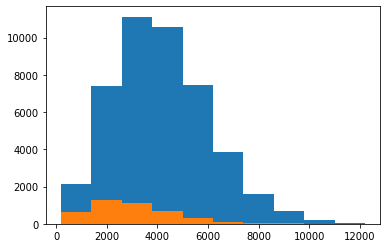

In [7]:
N_possible_connections, bins, xx = plt.hist(Cartesian_distances, bins=10)
N_connections, bins2, xx = plt.hist(Cartesian_distances_w_edge, bins=bins)

In [8]:
Prob = []
for x, y in zip(N_connections, N_possible_connections):
    Prob.append(x/y)
Info = -np.log2(np.array(Prob) )

/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log2
  after removing the cwd from sys.path.


Text(0, 0.5, 'infomation')

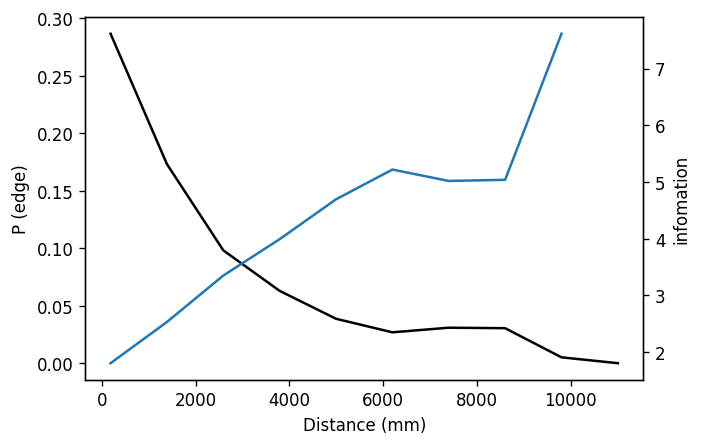

In [9]:
fig,ax = plt.subplots(dpi=120)
ax.plot(bins[:-1], Prob, c="black")
ax.set_xlabel("Distance (mm)")
ax.set_ylabel("P (edge)")
ax2 = ax.twinx()
ax2.plot(bins[:-1], Info)
ax2.set_ylabel("infomation")

In [10]:
# Construct Null Distribution with Siblings. 
# Run scripts

In [15]:
def MakeInfoDict(bins, Info, Mat):
    Dict1, Dict2 = {}, {}
    for node_i in Mat.index.values:
        for node_j in Mat.index.values:
            dist = Mat.loc[node_i, node_j]
            if dist == 0:
                continue
            for i in range(len(bins)-1):
                if dist >= bins[i] and dist < bins[i+1]:
                    Dict1["{}-{}".format(node_i, node_j)] = Info[i]
                    Dict2["{}-{}".format(node_i, node_j)] = 1
    return Dict1, Dict2

InfoDict, PlainDict = MakeInfoDict(bins, Info, Cartesian_distances_w_edge_mat)

In [29]:
pk.dump(InfoDict, open("dat/EdgeDict_selfInfo.pk", 'wb'))
pk.dump(PlainDict, open("dat/EdgeDict_Uniform.pk", 'wb'))

In [39]:
# ASD 
def SiblingTrim(g, topN, WeightDict, InputDir="dat/cont.sib.bias/ASD.sib.Spec.bias.{}.csv"):
    Cohes, Conns = [], []
    for i in range(10):
        df = pd.read_csv(InputDir.format(i), index_col="STR")
        CirSTRs, cohe, conn = GreedyTrim(df, g, topN, WeightDict)
        Cohes.append(cohe)
        Conns.append(conn)
    return Cohes, Conns

In [314]:
%%time
CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g, 40, InfoDict)
print(len(CirSTRs), cohe, conn)
print(RegionDistributionsList(CirSTRs))

IndexError: vertex index out of range

In [74]:
%%time
CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g, 45, PlainDict)
print(len(CirSTRs), cohe, conn)
print(RegionDistributionsList(CirSTRs))

6 0.35677034829577203 18
Striatum 	 1 	 Lateral_septal_nucleus_caudal_caudodorsal_part
Hippocampal_region 	 4 	 Field_CA1; Field_CA2; Field_CA3; Dentate_gyrus
Hippocampal_formation 	 1 	 Subiculum_dorsal_part
None
CPU times: user 771 ms, sys: 3.05 ms, total: 774 ms
Wall time: 775 ms


In [81]:
N_left = []
Cohesivness = []
for topN in range(10, 100, 1):
    CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g, topN, PlainDict)
    N_left.append(len(CirSTRs))
    Cohesiveness.append(cohe)

Text(0, 0.5, 'Circuit size after trimming')

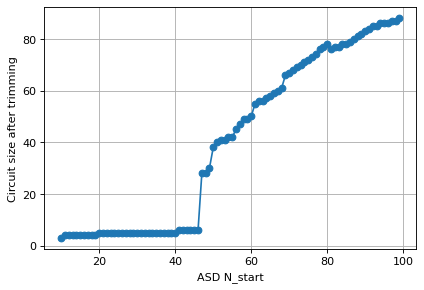

In [82]:
plt.plot(range(10, 100, 1), N_left, marker="o")
plt.grid(True)
plt.xlabel("ASD N_start")
plt.ylabel("Circuit size after trimming")

In [84]:
N_left = []
Cohesivness = []
for topN in range(10, 100, 1):
    CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g, topN, PlainDict)
    N_left.append(len(CirSTRs))
    Cohesivness.append(cohe)

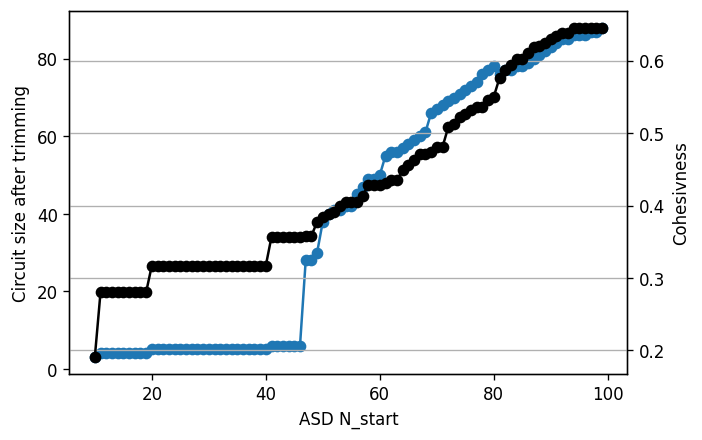

In [87]:
fig,ax = plt.subplots(dpi=120)
ax.plot(range(10, 100, 1), N_left, marker="o")
ax.set_xlabel("ASD N_start")
ax.set_ylabel("Circuit size after trimming")
ax2 = ax.twinx()
ax2.plot(range(10, 100, 1), Cohesivness, marker="o", color="black")
ax2.set_ylabel("Cohesivness")
plt.grid(True)
plt.show()

In [290]:
N_left = []
Cohesivness = []
for topN in range(10, 100, 1):
    CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g, topN, InfoDict)
    N_left.append(len(CirSTRs))
    Cohesivness.append(cohe)

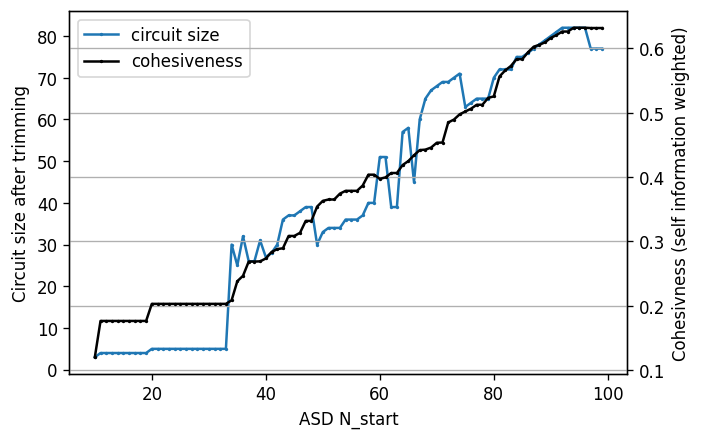

In [291]:
fig,ax = plt.subplots(dpi=120)
xx = ax.plot(range(10, 100, 1), N_left, marker="o", markersize=1, label="circuit size")
ax.set_xlabel("ASD N_start")
ax.set_ylabel("Circuit size after trimming")
ax2 = ax.twinx()
yy = ax2.plot(range(10, 100, 1), Cohesivness, marker="o", color="black",markersize=1, label="cohesiveness")
ax2.set_ylabel("Cohesivness (self information weighted)")
ax1.grid(True)
ax2.grid(True)
ax.legend(xx+yy, [x.get_label() for x in xx+yy])
plt.show()

In [295]:
CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g, 15, InfoDict)
RegionDistributionsList(CirSTRs)
cluster1 = CirSTRs

Hippocampal_region 	 4 	 Field_CA1; Field_CA2; Field_CA3; Dentate_gyrus


In [296]:
_, mask_hippo = MaskCortex2Cortex(adj_mat, cluster1)

In [298]:
g_mask_hippo = LoadConnectome2(mask_hippo)

In [300]:
CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g_mask_hippo, 50, InfoDict)
RegionDistributionsList(CirSTRs)
cluster1 = CirSTRs

Olfactory_areas 	 3 	 Accessory_olfactory_bulb; Anterior_olfactory_nucleus; Dorsal_peduncular_area
Cortical_subplate 	 3 	 Basolateral_amygdalar_nucleus; Claustrum; Endopiriform_nucleus_dorsal_part
Thalamus 	 5 	 Lateral_posterior_nucleus_of_the_thalamus; Mediodorsal_nucleus_of_thalamus; Parafascicular_nucleus; Nucleus_of_reuniens; Submedial_nucleus_of_the_thalamus
Isocortex 	 19 	 Anterior_cingulate_area_dorsal_part; Anterior_cingulate_area_ventral_part; Agranular_insular_area_posterior_part; Agranular_insular_area_ventral_part; Frontal_pole_cerebral_cortex; Gustatory_areas; Infralimbic_area; Primary_motor_area; Secondary_motor_area; Orbital_area_lateral_part; Orbital_area_medial_part; Orbital_area_ventrolateral_part; Prelimbic_area; Posterior_parietal_association_areas; Retrosplenial_area_lateral_agranular_part; Visceral_area; Anteromedial_visual_area; Lateral_visual_area; Primary_visual_area
Striatum 	 2 	 Nucleus_accumbens; Caudoputamen
Hippocampal_formation 	 1 	 Subiculum_dorsal_

In [301]:
mask_hippo.to_csv("../dat/allen-mouse-conn/adj_mat.hippo_mask.csv")

In [92]:
Local_adjmat_cartesian = pd.read_csv("../dat/allen-mouse-conn/adj_mat_cartesian_local.csv", index_col=0)
Global_adjmat_cartesian = pd.read_csv("../dat/allen-mouse-conn/adj_mat_cartesian_distal.csv", index_col=0)
g_local_cartesian = LoadConnectome2(Local_adjmat_cartesian)
g_global_cartesian = LoadConnectome2(Global_adjmat_cartesian)

In [96]:
N_left = []
Cohesivness = []
for topN in range(10, 100, 1):
    CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g_global_cartesian, topN, InfoDict)
    N_left.append(len(CirSTRs))
    Cohesivness.append(cohe)

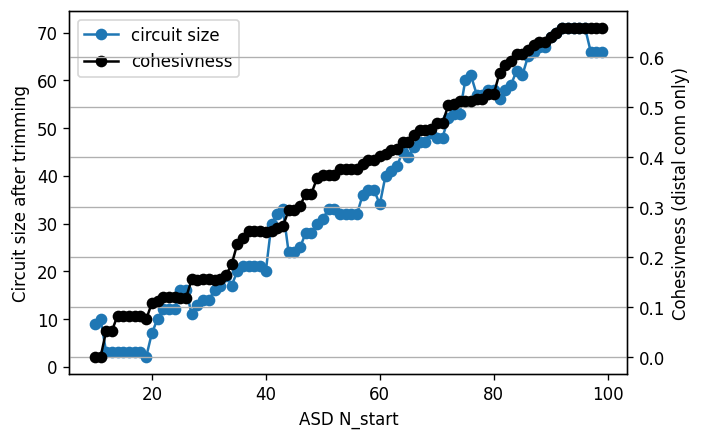

In [104]:
fig,ax = plt.subplots(dpi=120)
xx = ax.plot(range(10, 100, 1), N_left, marker="o", label="circuit size")
ax.set_xlabel("ASD N_start")
ax.set_ylabel("Circuit size after trimming")
ax2 = ax.twinx()
yy = ax2.plot(range(10, 100, 1), Cohesivness, marker="o", color="black", label="cohesivness")
ax2.set_ylabel("Cohesivness (distal conn only)")
plt.grid(True)
ax.legend(xx+yy, [x.get_label() for x in xx+yy])
plt.show()

In [175]:
test_strs = [x.strip() for x in open("dat/test.txt", 'rt').readlines()]
sib_cohe, sib_conn = ScoreSTRSet(g_global_cartesian, test_strs, PlainDict, Weighted=True, Direction=False)

In [176]:
sib_cohe

0.875380061169332

In [265]:
CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g_1300, 50, InfoDict)
print(cohe)

0.36429590082534735


In [277]:
print(len(CirSTRs))
RegionDistributionsList(CirSTRs)

31
Olfactory_areas 	 3 	 Accessory_olfactory_bulb; Anterior_olfactory_nucleus; Dorsal_peduncular_area
Cortical_subplate 	 3 	 Basolateral_amygdalar_nucleus; Claustrum; Endopiriform_nucleus_dorsal_part
Thalamus 	 5 	 Lateral_posterior_nucleus_of_the_thalamus; Mediodorsal_nucleus_of_thalamus; Parafascicular_nucleus; Nucleus_of_reuniens; Submedial_nucleus_of_the_thalamus
Isocortex 	 17 	 Anterior_cingulate_area_dorsal_part; Anterior_cingulate_area_ventral_part; Agranular_insular_area_posterior_part; Agranular_insular_area_ventral_part; Frontal_pole_cerebral_cortex; Gustatory_areas; Infralimbic_area; Secondary_motor_area; Orbital_area_lateral_part; Orbital_area_medial_part; Orbital_area_ventrolateral_part; Prelimbic_area; Posterior_parietal_association_areas; Retrosplenial_area_lateral_agranular_part; Anteromedial_visual_area; Lateral_visual_area; Primary_visual_area
Striatum 	 2 	 Nucleus_accumbens; Caudoputamen
Hippocampal_formation 	 1 	 Subiculum_dorsal_part


In [41]:
CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g, 30, PlainDict)

In [40]:
sib_Cohes, sib_Conns = SiblingTrim(g, 30, InfoDict)

In [43]:
Z, P = GetPermutationP(sib_Cohes, cohe)
Z

2.919912565189315

In [44]:
Z, P = GetPermutationP(sib_Conns, conn)
Z

-1.6687411898212998

In [47]:
np.mean(sib_Cohes)

0.19968970404157554

In [46]:
np.mean(Sib_Cohes[4])

0.20070830490011277

In [54]:
ASD_Cohes, ASD_Conns = [], []
Sib_Cohes, Sib_Conns = [], []
for topN in range(10, 215, 5):
    print(topN)
    CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g_, topN, PlainDict)
    ASD_Cohes.append(cohe)
    ASD_Conns.append(conn)
    sib_hand = open("dat/SibTrimCir/distal_top_{}_circuit_strs.txt".format(topN))
    _sib_Cohes, _sib_Conns = [], []
    for l in sib_hand.readlines():
        sib_strs = l.split(",")
        sib_cohe, sib_conn = ScoreSTRSet(g, sib_strs, PlainDict, Weighted=True, Direction=False)
        _sib_Cohes.append(sib_cohe)
        _sib_Conns.append(sib_conn)
    Sib_Cohes.append(_sib_Cohes)
    Sib_Conns.append(_sib_Conns)
Sib_Cohes = np.array(Sib_Cohes)
SIb_Conns = np.array(Sib_Conns)

10
15
20
25
30
35
40
45
50
55
60
65
70


/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [57]:
Sib_Cohes.shape

(13,)

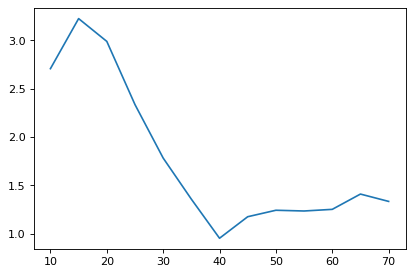

In [58]:
Zscores = []
for i, topN in enumerate(range(10, 75, 5)):
    Z, P = GetPermutationP(Sib_Cohes[i], ASD_Cohes[i])
    Zscores.append(Z)
plt.plot(range(10, 75, 5), Zscores)

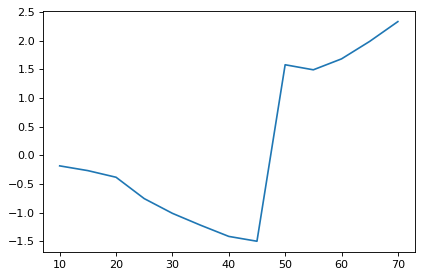

In [60]:
Zscores = []
for i, topN in enumerate(range(10, 75, 5)):
    Z, P = GetPermutationP(Sib_Conns[i], ASD_Conns[i])
    Zscores.append(Z)
plt.plot(range(10, 75, 5), Zscores)

In [116]:
ASD_Cohes_info, ASD_Conns_info = [], []
Sib_Cohes_info, Sib_Conns_info = [], []
for topN in range(10, 215, 5):
    print(topN)
    CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g_global_cartesian, topN, PlainDict)
    ASD_Cohes_info.append(cohe)
    ASD_Conns_info.append(conn)
    sib_hand = open("dat/SibTrimCir/distal_top_{}_circuit_strs.txt".format(topN))
    _sib_Cohes, _sib_Conns = [], []
    for l in sib_hand.readlines():
        sib_strs = l.split(",")
        sib_cohe, sib_conn = ScoreSTRSet(g_global_cartesian, sib_strs, PlainDict, Weighted=True, Direction=False)
        _sib_Cohes.append(sib_cohe)
        _sib_Conns.append(sib_conn)
    Sib_Cohes_info.append(_sib_Cohes)
    Sib_Conns_info.append(_sib_Conns)
Sib_Cohes_info = np.array(Sib_Cohes_info)
Sib_Conns_info = np.array(Sib_Conns_info)

10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210


/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/jiayao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [184]:
sibxx = [np.mean(x) for x in Sib_Cohes_info]
yerr = [np.std(x) for x in Sib_Cohes_info]
Zscores = []
for i, topN in enumerate(range(10, 215, 5)):
    Z, P = GetPermutationP(Sib_Cohes_info[i], ASD_Cohes_info[i])
    Zscores.append(Z)

In [185]:
print(sibxx[33], yerr[33])

0.826356333220286 0.03212028378539012


Text(0, 0.5, 'Cohesivness after trimming')

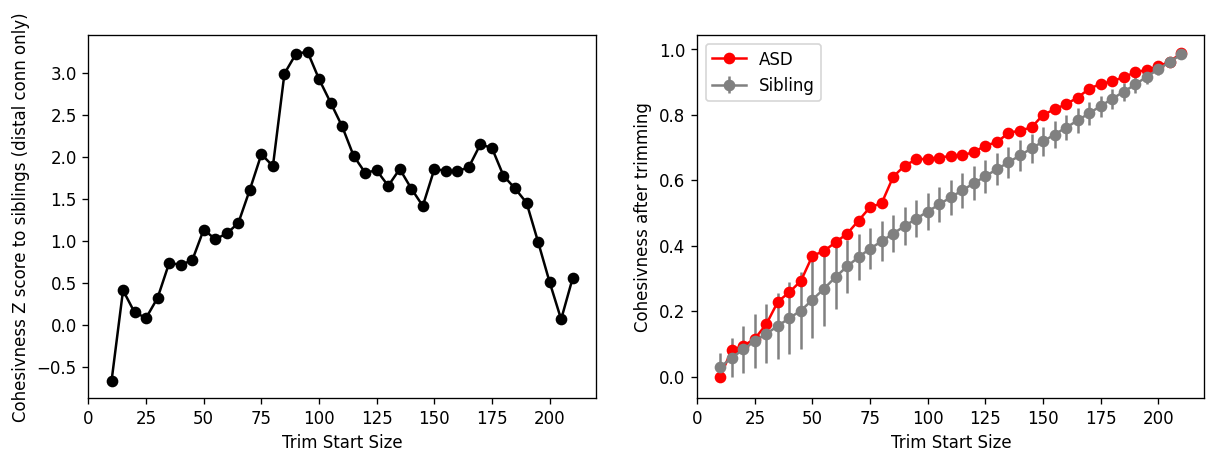

In [168]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), dpi=120)
ax1.plot(range(10, 215, 5), Zscores, marker="o", color="black")
ax1.set_xlabel("Trim Start Size")
ax1.set_ylabel("Cohesivness Z score to siblings (distal conn only)")
ax2.plot(range(10, 215, 5), ASD_Cohes_info, marker="o", color="red", label="ASD")
ax2.errorbar(range(10, 215, 5), sibxx, yerr=yerr , marker="o", color="grey", label="Sibling")
ax2.legend()
ax2.set_xlabel("Trim Start Size")
ax2.set_ylabel("Cohesivness after trimming")

In [169]:
sibxx = [np.mean(x) for x in Sib_Conns_info]
yerr = [np.std(x) for x in Sib_Conns_info]
Zscores = []
for i, topN in enumerate(range(10, 215, 5)):
    Z, P = GetPermutationP(Sib_Conns_info[i], ASD_Conns_info[i])
    Zscores.append(Z)

Text(0, 0.5, 'Cohesivness after trimming')

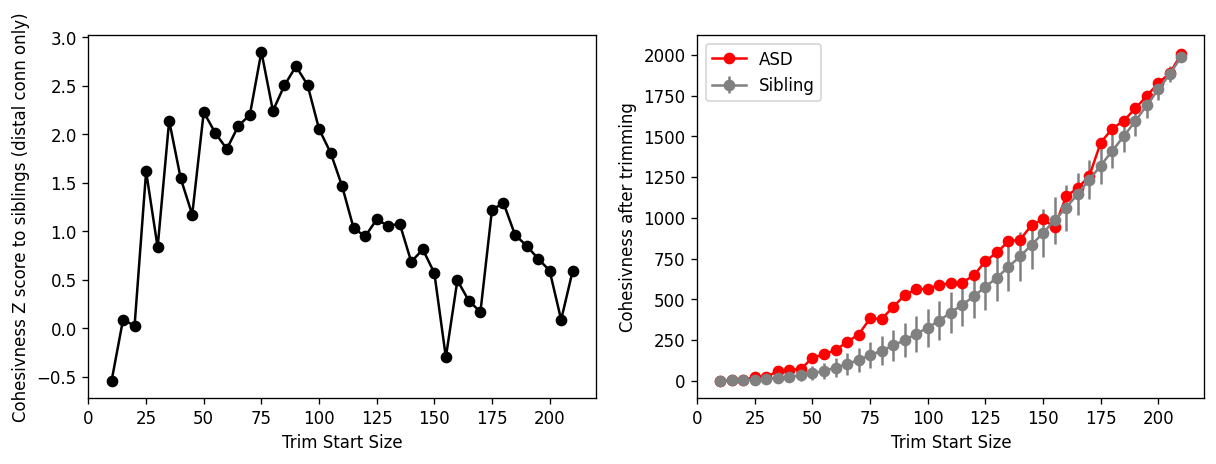

In [170]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), dpi=120)
ax1.plot(range(10, 215, 5), Zscores, marker="o", color="black")
ax1.set_xlabel("Trim Start Size")
ax1.set_ylabel("Cohesivness Z score to siblings (distal conn only)")
ax2.plot(range(10, 215, 5), ASD_Conns_info, marker="o", color="red", label="ASD")
ax2.errorbar(range(10, 215, 5), sibxx, yerr=yerr , marker="o", color="grey", label="Sibling")
ax2.legend()
ax2.set_xlabel("Trim Start Size")
ax2.set_ylabel("Cohesivness after trimming")

In [284]:
CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g_global_cartesian, 50, InfoDict)

In [285]:
print(len(CirSTRs))
RegionDistributionsList(CirSTRs)

31
Olfactory_areas 	 3 	 Accessory_olfactory_bulb; Anterior_olfactory_nucleus; Dorsal_peduncular_area
Cortical_subplate 	 3 	 Basolateral_amygdalar_nucleus; Claustrum; Endopiriform_nucleus_dorsal_part
Thalamus 	 5 	 Lateral_posterior_nucleus_of_the_thalamus; Mediodorsal_nucleus_of_thalamus; Parafascicular_nucleus; Nucleus_of_reuniens; Submedial_nucleus_of_the_thalamus
Isocortex 	 17 	 Anterior_cingulate_area_dorsal_part; Anterior_cingulate_area_ventral_part; Agranular_insular_area_posterior_part; Agranular_insular_area_ventral_part; Frontal_pole_cerebral_cortex; Gustatory_areas; Infralimbic_area; Secondary_motor_area; Orbital_area_lateral_part; Orbital_area_medial_part; Orbital_area_ventrolateral_part; Prelimbic_area; Posterior_parietal_association_areas; Retrosplenial_area_lateral_agranular_part; Anteromedial_visual_area; Lateral_visual_area; Primary_visual_area
Striatum 	 2 	 Nucleus_accumbens; Caudoputamen
Hippocampal_formation 	 1 	 Subiculum_dorsal_part


In [239]:
volumns = pd.read_csv("dat/voxel.csv")
volumns.head(2)
#total_v = volumns["VOLUME"].sum()

,KEY,VOLUME
0,Basic_cell_groups_and_regions,417724
1,Cerebrum,261163


In [242]:
volumns_213 = volumns[volumns["KEY"].isin(SparkMetaBias.index)]
total_v = volumns_213["VOLUME"].sum()
print(total_v)

386569


In [279]:
inCirtuit = volumns_213[volumns_213["KEY"].isin(CirSTRs+["Dentate_gyrus", "Field_CA1", "Field_CA2", "Field_CA3"])]
inCirtuit_v = inCirtuit["VOLUME"].sum()
print(inCirtuit_v/total_v)

0.27040192048508804


In [244]:
69 / 213

0.323943661971831

In [182]:
np.arange(10, 215, 5)[33]

175

In [183]:
print(sibxx[33], yerr[33])

115.31574961958916

In [219]:
def xxZscoreEveryStartSize(ASD_BiasDF, g_conn, WeightDict, file_hand, Start_sizes=np.arange(10, 215, 5)):
    ASD_Cohes_info, ASD_Conns_info = [], []
    Sib_Cohes_info, Sib_Conns_info = [], []
    for topN in Start_sizes:
        print(topN)
        CirSTRs, cohe, conn = GreedyTrim(ASD_BiasDF, g_conn, topN, WeightDict)
        ASD_Cohes_info.append(cohe)
        ASD_Conns_info.append(conn)
        sib_hand = open(file_hand.format(topN))
        _sib_Cohes, _sib_Conns = [], []
        for l in sib_hand.readlines():
            sib_strs = l.split(",")
            sib_cohe, sib_conn = ScoreSTRSet(g_conn, sib_strs, WeightDict, Weighted=True, Direction=False)
            _sib_Cohes.append(sib_cohe)
            _sib_Conns.append(sib_conn)
        Sib_Cohes_info.append(_sib_Cohes)
        Sib_Conns_info.append(_sib_Conns)
    Sib_Cohes_info = np.array(Sib_Cohes_info)
    Sib_Conns_info = np.array(Sib_Conns_info)
    return ASD_Cohes_info, ASD_Conns_info, Sib_Cohes_info, Sib_Conns_info

In [223]:
#Local_adjmat_cartesian = pd.read_csv("../dat/allen-mouse-conn/adj_mat_cartesian_local.csv", index_col=0)
Global_adjmat_cartesian = pd.read_csv("../dat/allen-mouse-conn/adj_mat_cartesian_distal.csv", index_col=0)
#g_local_cartesian = LoadConnectome2(Local_adjmat_cartesian)
g_global_cartesian = LoadConnectome2(Global_adjmat_cartesian)
adjmat_cartesian_1300 = pd.read_csv("../dat/allen-mouse-conn/adj_mat_cartesian_distal.cut1300.csv", index_col=0)
g_1300 = LoadConnectome2(Global_adjmat_cartesian)

In [224]:
# dist-1300
hand = "dat/SibTrimCir/dist1300_info_top_{}_circuit_strs.txt"
weightdict = InfoDict
ASD_Cohes_info, ASD_Conns_info, Sib_Cohes_info, Sib_Conns_info = xxZscoreEveryStartSize(SparkMetaBias, 
                                                        g_1300, weightdict, hand)

10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210


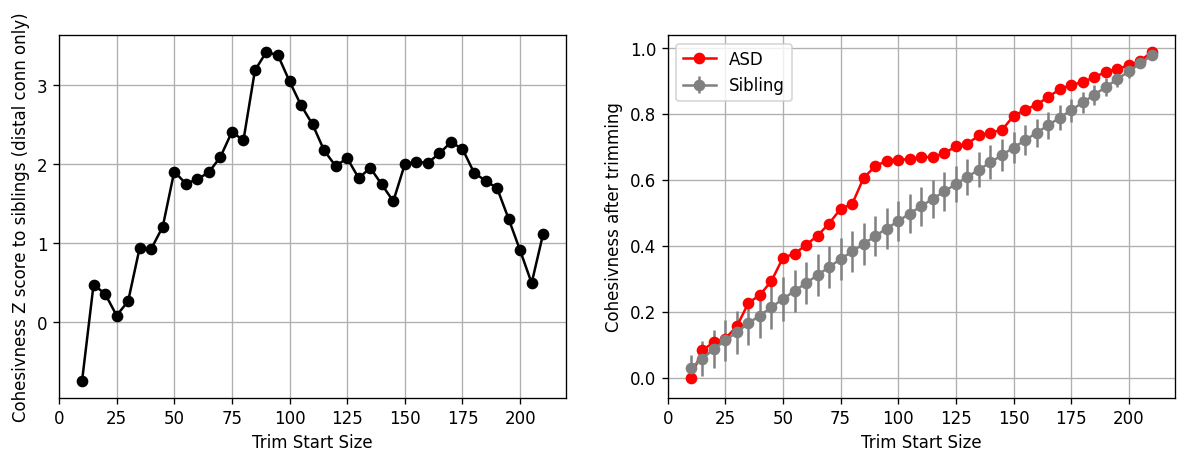

In [261]:
sibxx = [np.mean(x) for x in Sib_Cohes_info]
yerr = [np.std(x) for x in Sib_Cohes_info]
Zscores = []
for i, topN in enumerate(range(10, 215, 5)):
    Z, P = GetPermutationP(Sib_Cohes_info[i], ASD_Cohes_info[i])
    Zscores.append(Z)
    
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), dpi=120)
ax1.plot(range(10, 215, 5), Zscores, marker="o", color="black")
ax1.set_xlabel("Trim Start Size")
ax1.set_ylabel("Cohesivness Z score to siblings (distal conn only)")
ax2.plot(range(10, 215, 5), ASD_Cohes_info, marker="o", color="red", label="ASD")
ax2.errorbar(range(10, 215, 5), sibxx, yerr=yerr , marker="o", color="grey", label="Sibling")
ax2.legend()
ax2.set_xlabel("Trim Start Size")
ax2.set_ylabel("Cohesivness after trimming")
ax1.grid(True)
ax2.grid(True)

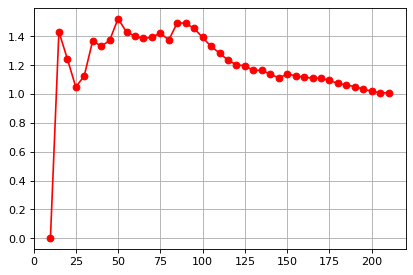

In [262]:
plt.plot(range(10, 215, 5), np.array(ASD_Cohes_info)/sibxx, marker="o", color="red", label="ASD")
plt.grid(True)
plt.show()

In [276]:
print(np.mean(SparkMetaBias.head(25)["EFFECT"]))
print(np.mean(SparkMetaBias.head(50)["EFFECT"]))
print(np.mean(SparkMetaBias.head(75)["EFFECT"]))

0.3623308785668261
0.31168010419935477
0.2727367943704615


In [228]:
# dist-1300
hand = "dat/SibTrimCir/xx_info_top_{}_circuit_strs.txt"
weightdict = InfoDict
ASD_Cohes_info2, ASD_Conns_info2, Sib_Cohes_info2, Sib_Conns_info2 = xxZscoreEveryStartSize(SparkMetaBias, 
                                                        g, weightdict, hand)

10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210


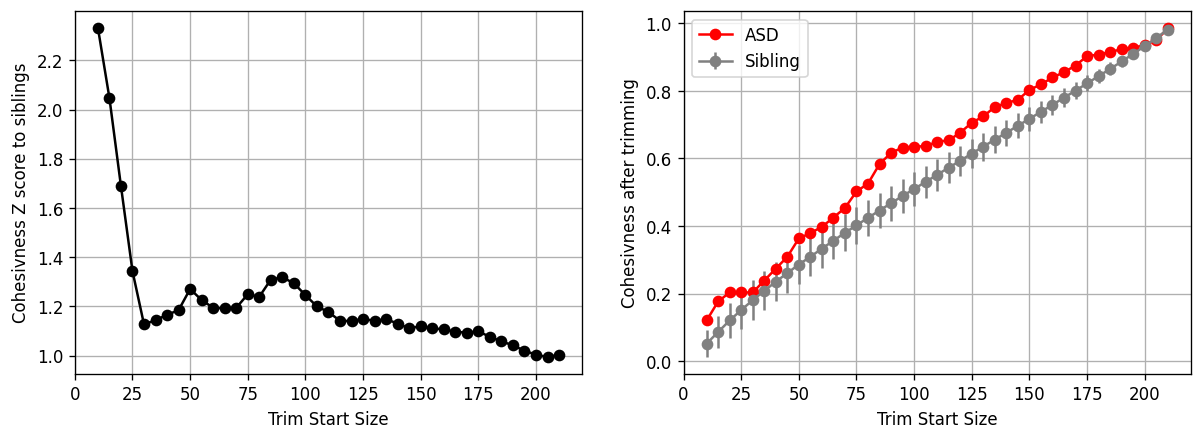

In [302]:
sibxx = [np.mean(x) for x in Sib_Cohes_info2]
yerr = [np.std(x) for x in Sib_Cohes_info2]
Zscores = []
for i, topN in enumerate(range(10, 215, 5)):
    Z, P = GetPermutationP(Sib_Cohes_info2[i], ASD_Cohes_info2[i])
    Zscores.append(Z)
    
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), dpi=120)
ax1.plot(range(10, 215, 5), np.array(ASD_Cohes_info2)/sibxx, marker="o", color="black")
ax1.set_xlabel("Trim Start Size")
ax1.set_ylabel("Cohesivness Z score to siblings")
ax2.plot(range(10, 215, 5), ASD_Cohes_info2, marker="o", color="red", label="ASD")
ax2.errorbar(range(10, 215, 5), sibxx, yerr=yerr , marker="o", color="grey", label="Sibling")
ax2.legend()
ax2.set_xlabel("Trim Start Size")
ax2.set_ylabel("Cohesivness after trimming")
ax1.grid(True)
ax2.grid(True)

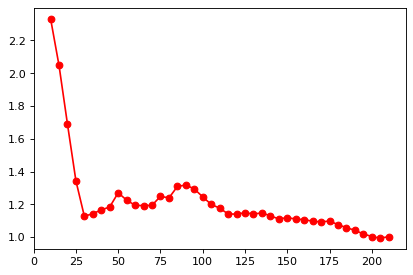

In [260]:
plt.plot(range(10, 215, 5), np.array(ASD_Cohes_info2)/sibxx, marker="o", color="red", label="ASD")

In [288]:
CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g, 10, InfoDict)

In [305]:
# First Round

adj_mat_Hippomask = pd.read_csv("../dat/allen-mouse-conn/adj_mat.hippo_mask.csv", index_col=0)
g_hippomask = LoadConnectome2(adj_mat_Hippomask)


hand = "dat/SibTrimCir/mask_hippo_info_top_{}_circuit_strs.txt"
weightdict = InfoDict
slices = np.arange(5, 150, 5)
ASD_Cohes_info2, ASD_Conns_info2, Sib_Cohes_info2, Sib_Conns_info2 = xxZscoreEveryStartSize(SparkMetaBias, 
                                                        g_hippomask, weightdict, hand, Start_sizes=slices)

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145


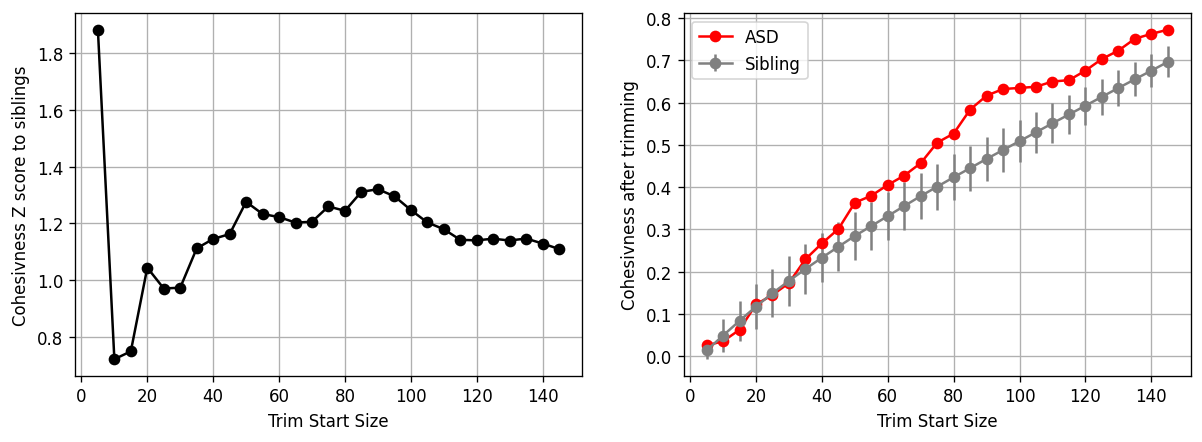

In [306]:
sibxx = [np.mean(x) for x in Sib_Cohes_info2]
yerr = [np.std(x) for x in Sib_Cohes_info2]
Zscores = []
for i, topN in enumerate(slices):
    Z, P = GetPermutationP(Sib_Cohes_info2[i], ASD_Cohes_info2[i])
    Zscores.append(Z)
ASD_Cohes_info2 = np.array(ASD_Cohes_info2)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), dpi=120)
ax1.plot(slices, ASD_Cohes_info2/sibxx, marker="o", color="black")
ax1.set_xlabel("Trim Start Size")
ax1.set_ylabel("Cohesivness Z score to siblings")
ax2.plot(slices, ASD_Cohes_info2, marker="o", color="red", label="ASD")
ax2.errorbar(slices, sibxx, yerr=yerr , marker="o", color="grey", label="Sibling")
ax2.legend()
ax2.set_xlabel("Trim Start Size")
ax2.set_ylabel("Cohesivness after trimming")
ax1.grid(True)
ax2.grid(True)

In [309]:
CirSTRs, cohe, conn = GreedyTrim(SparkMetaBias, g_hippomask, 50, InfoDict)
print(len(CirSTRs), cohe, conn)
RegionDistributionsList(CirSTRs)

33 0.3631097996506592 245
Olfactory_areas 	 3 	 Accessory_olfactory_bulb; Anterior_olfactory_nucleus; Dorsal_peduncular_area
Cortical_subplate 	 3 	 Basolateral_amygdalar_nucleus; Claustrum; Endopiriform_nucleus_dorsal_part
Thalamus 	 5 	 Lateral_posterior_nucleus_of_the_thalamus; Mediodorsal_nucleus_of_thalamus; Parafascicular_nucleus; Nucleus_of_reuniens; Submedial_nucleus_of_the_thalamus
Isocortex 	 19 	 Anterior_cingulate_area_dorsal_part; Anterior_cingulate_area_ventral_part; Agranular_insular_area_posterior_part; Agranular_insular_area_ventral_part; Frontal_pole_cerebral_cortex; Gustatory_areas; Infralimbic_area; Primary_motor_area; Secondary_motor_area; Orbital_area_lateral_part; Orbital_area_medial_part; Orbital_area_ventrolateral_part; Prelimbic_area; Posterior_parietal_association_areas; Retrosplenial_area_lateral_agranular_part; Visceral_area; Anteromedial_visual_area; Lateral_visual_area; Primary_visual_area
Striatum 	 2 	 Nucleus_accumbens; Caudoputamen
Hippocampal_formati